In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#15ntABr inside

In [ ]:
# Load data
data = pd.read_csv('xx.csv')

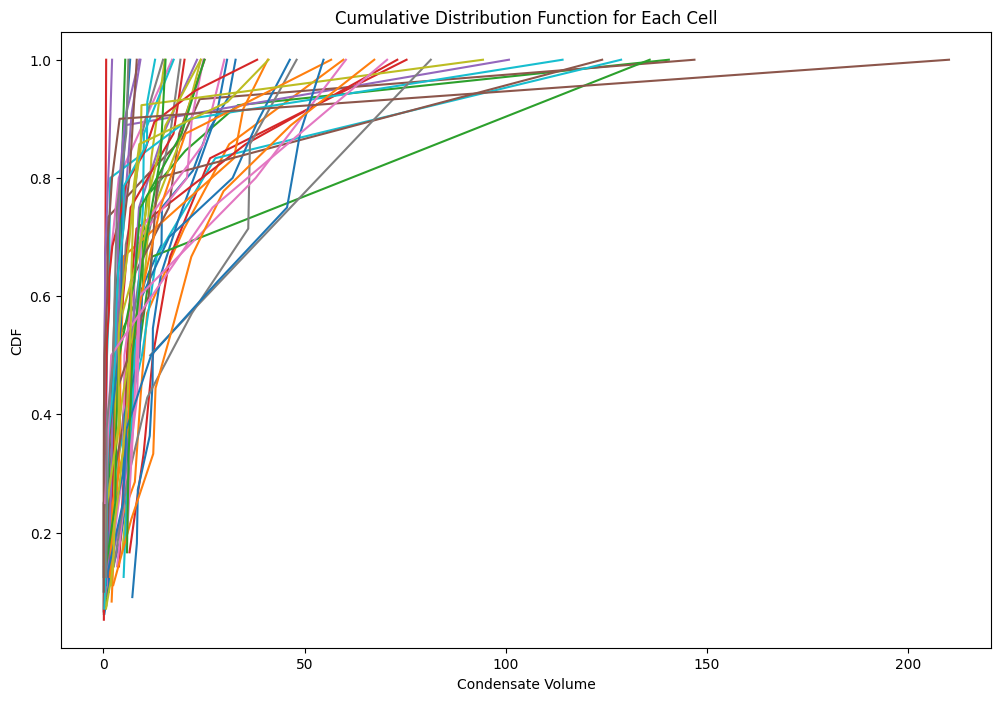

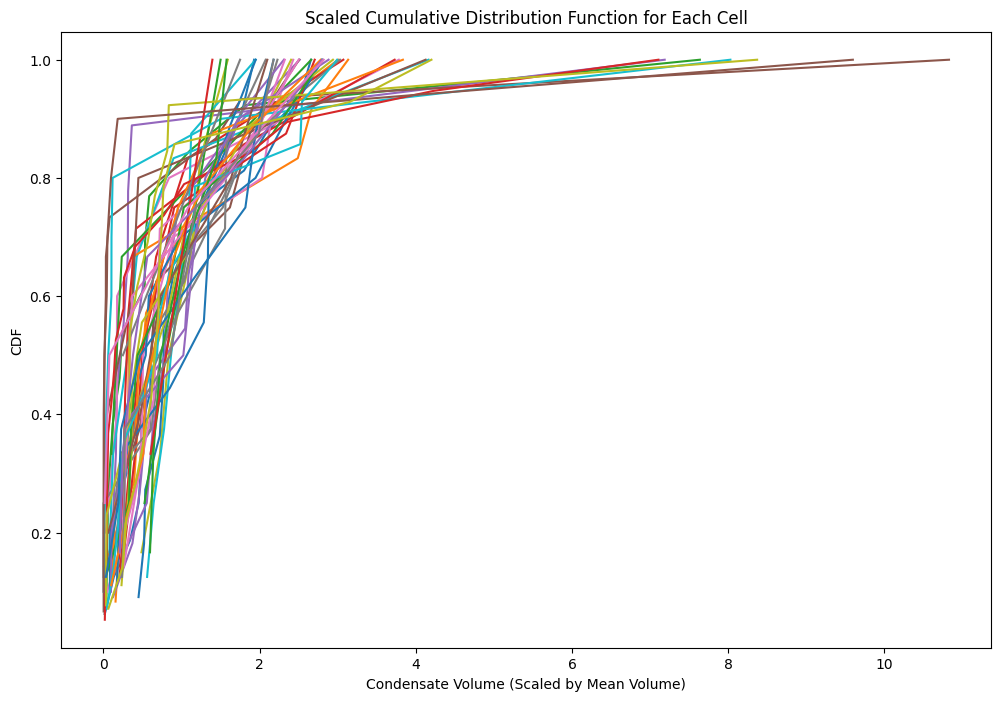

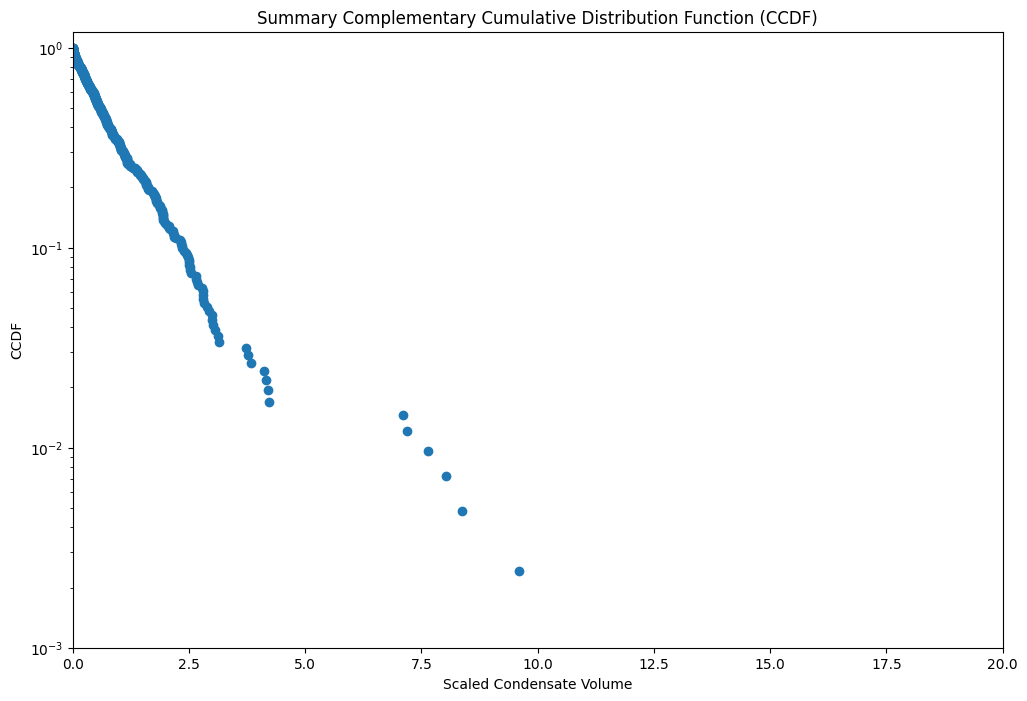

Mean condensate volume for cell 1: 12.36
Mean condensate volume for cell 2: 19.84
Mean condensate volume for cell 3: 18.40
Mean condensate volume for cell 4: 24.52
Mean condensate volume for cell 5: 14.02
Mean condensate volume for cell 19: 13.57
Mean condensate volume for cell 20: 4.51
Mean condensate volume for cell 6: 8.58
Mean condensate volume for cell 7: 9.57
Mean condensate volume for cell 8: 30.90
Mean condensate volume for cell 9: 15.92
Mean condensate volume for cell 21: 13.03
Mean condensate volume for cell 10: 51.00
Mean condensate volume for cell 11: 19.58
Mean condensate volume for cell 12: 9.25
Mean condensate volume for cell 22: 10.04
Mean condensate volume for cell 13: 10.22
Mean condensate volume for cell 14: 4.89
Mean condensate volume for cell 15: 10.07
Mean condensate volume for cell 23: 8.95
Mean condensate volume for cell 16: 16.48
Mean condensate volume for cell 24: 84.90
Mean condensate volume for cell 25: 3.61
Mean condensate volume for cell 26: 7.44
Mean cond

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Plot the CDFs for each cell
plt.figure(figsize=(12, 8))
for cell, (volumes, cdf) in cdf_dict.items():
    plt.plot(volumes, cdf, label=f'Cell {cell}')
plt.title('Cumulative Distribution Function for Each Cell')
plt.xlabel('Condensate Volume')
plt.ylabel('CDF')
# plt.legend()
plt.show()

# Plot the scaled CDFs for each cell
plt.figure(figsize=(12, 8))
for cell, (scaled_volumes, scaled_cdf) in scaled_cdf_dict.items():
    plt.plot(scaled_volumes, scaled_cdf, label=f'Cell {cell} (Scaled)')
plt.title('Scaled Cumulative Distribution Function for Each Cell')
plt.xlabel('Condensate Volume (Scaled by Mean Volume)')
plt.ylabel('CDF')
# plt.legend()
plt.show()

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Plot the summary CCDF
plt.figure(figsize=(12, 8))
plt.scatter(np.sort(all_volumes), ccdf, label='Summary CCDF')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF')
# plt.legend()
plt.xlim(0, 20)
plt.ylim(0.001,1.2)
plt.show()

# Calculate and print mean condensate volumes for each cell
for cell, mean_volume in mean_volume_dict.items():
    print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


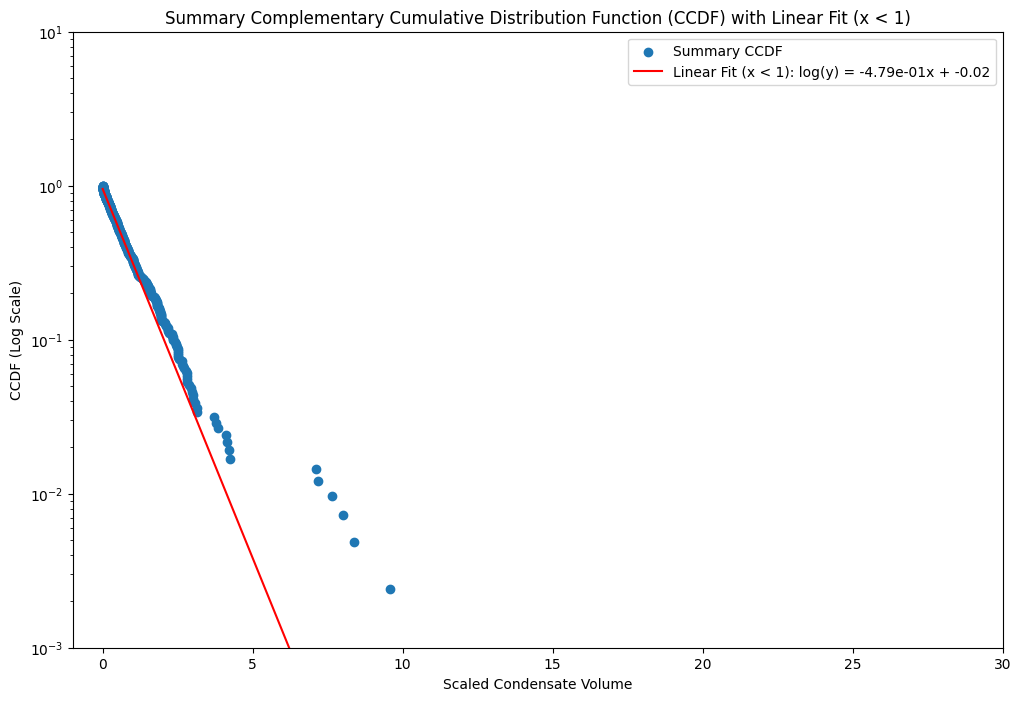

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('xx.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/15ntABr_inside_linear.svg')
plt.show()

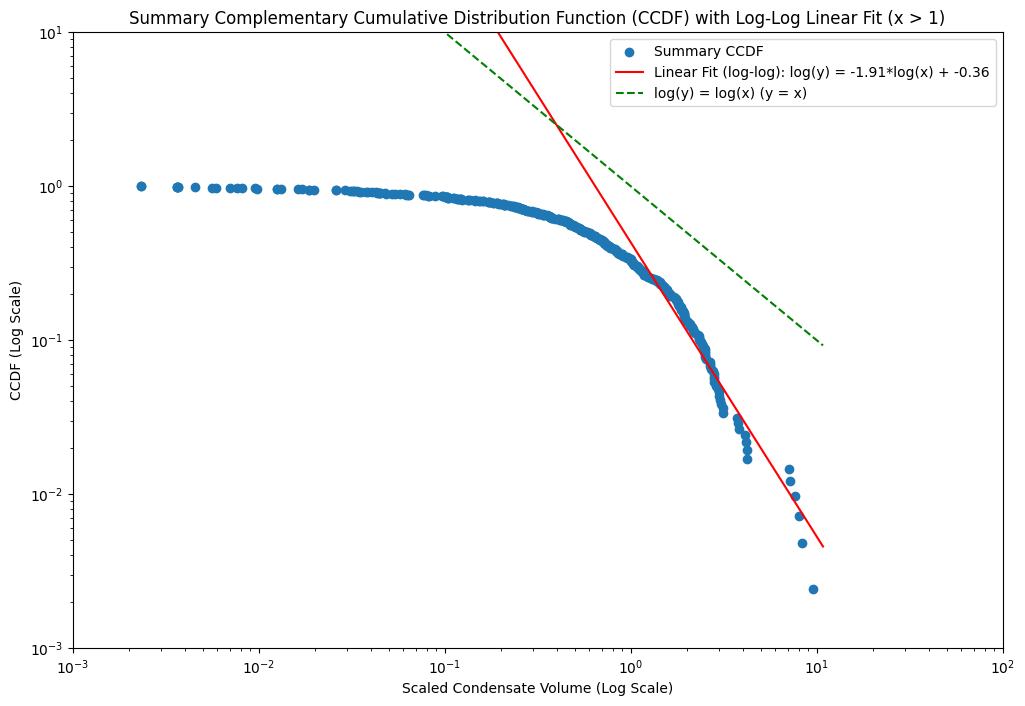

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/15ntABr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#15ntABr outside

In [ ]:
# Load data
data = pd.read_csv('/test_JABr_outside.csv')

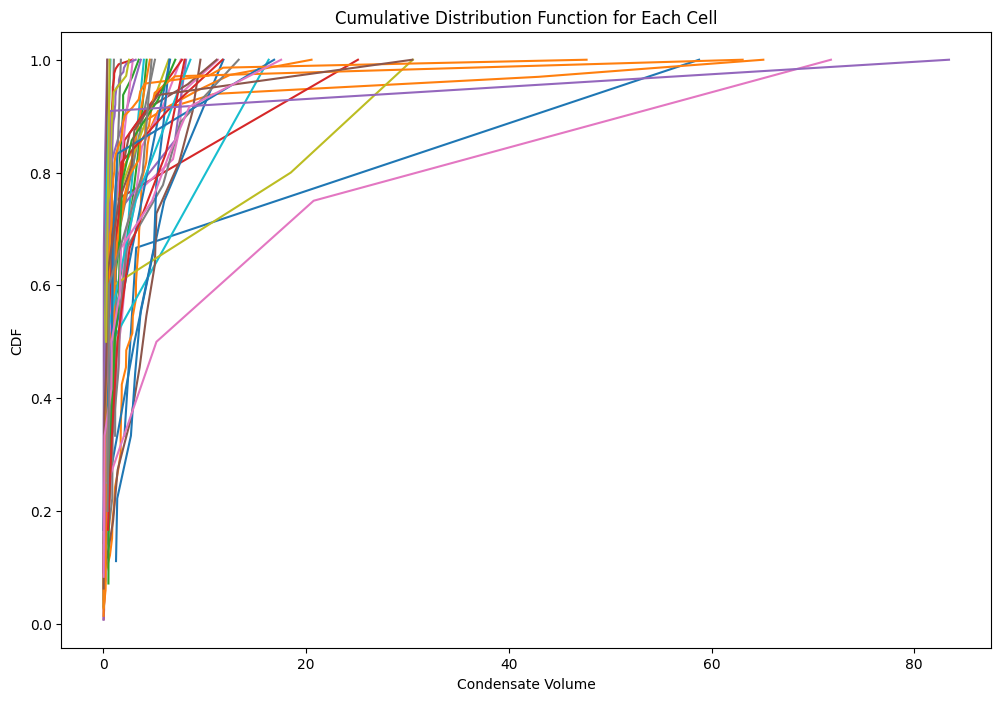

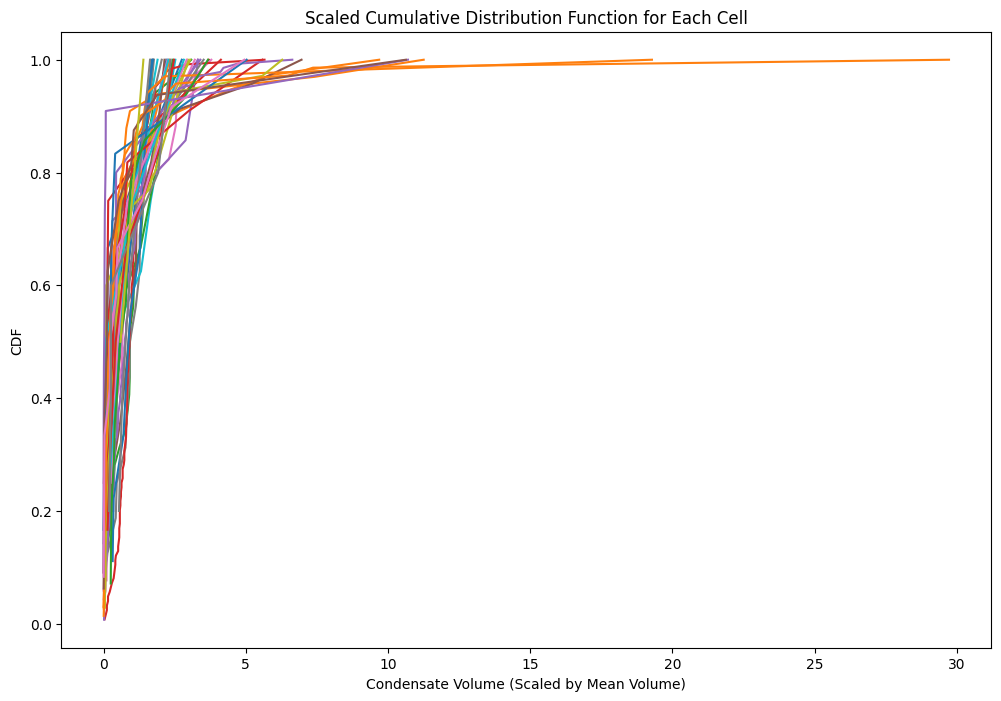

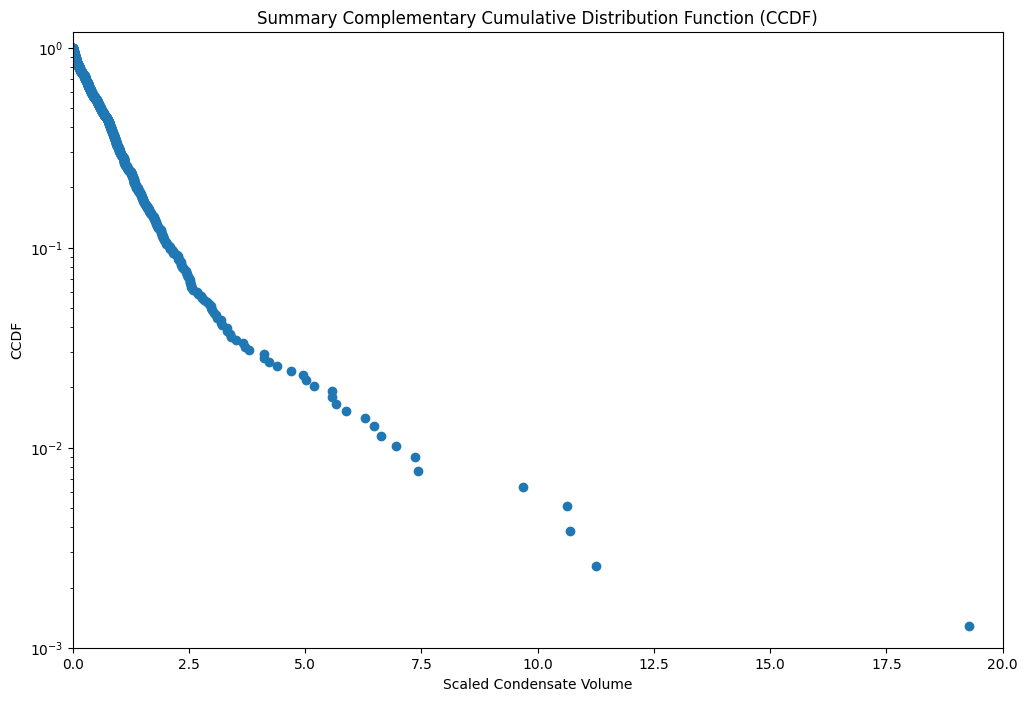

Mean condensate volume for cell 1.0: 21.36
Mean condensate volume for cell 2.0: 5.79
Mean condensate volume for cell 3.0: 1.13
Mean condensate volume for cell 4.0: 6.78
Mean condensate volume for cell 5.0: 0.11
Mean condensate volume for cell 6.0: 0.22
Mean condensate volume for cell 7.0: 2.98
Mean condensate volume for cell 8.0: 0.58
Mean condensate volume for cell 9.0: 0.54
Mean condensate volume for cell 10.0: 1.58
Mean condensate volume for cell 11.0: 5.35
Mean condensate volume for cell 12.0: 2.12
Mean condensate volume for cell 13.0: 1.75
Mean condensate volume for cell 14.0: 0.51
Mean condensate volume for cell 15.0: 2.45
Mean condensate volume for cell 16.0: 1.60
Mean condensate volume for cell 17.0: 2.38
Mean condensate volume for cell 18.0: 2.48
Mean condensate volume for cell 19.0: 2.11
Mean condensate volume for cell 20.0: 8.58
Mean condensate volume for cell 21.0: 3.78
Mean condensate volume for cell 22.0: 1.97
Mean condensate volume for cell 23.0: 0.18
Mean condensate vol

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Plot the CDFs for each cell
plt.figure(figsize=(12, 8))
for cell, (volumes, cdf) in cdf_dict.items():
    plt.plot(volumes, cdf, label=f'Cell {cell}')
plt.title('Cumulative Distribution Function for Each Cell')
plt.xlabel('Condensate Volume')
plt.ylabel('CDF')
# plt.legend()
plt.show()

# Plot the scaled CDFs for each cell
plt.figure(figsize=(12, 8))
for cell, (scaled_volumes, scaled_cdf) in scaled_cdf_dict.items():
    plt.plot(scaled_volumes, scaled_cdf, label=f'Cell {cell} (Scaled)')
plt.title('Scaled Cumulative Distribution Function for Each Cell')
plt.xlabel('Condensate Volume (Scaled by Mean Volume)')
plt.ylabel('CDF')
# plt.legend()
plt.show()

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Plot the summary CCDF
plt.figure(figsize=(12, 8))
plt.scatter(np.sort(all_volumes), ccdf, label='Summary CCDF')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF')
# plt.legend()
plt.xlim(0,20)
plt.ylim(0.001,1.2)
plt.show()

# Calculate and print mean condensate volumes for each cell
for cell, mean_volume in mean_volume_dict.items():
    print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


fit linear to data points with x<3

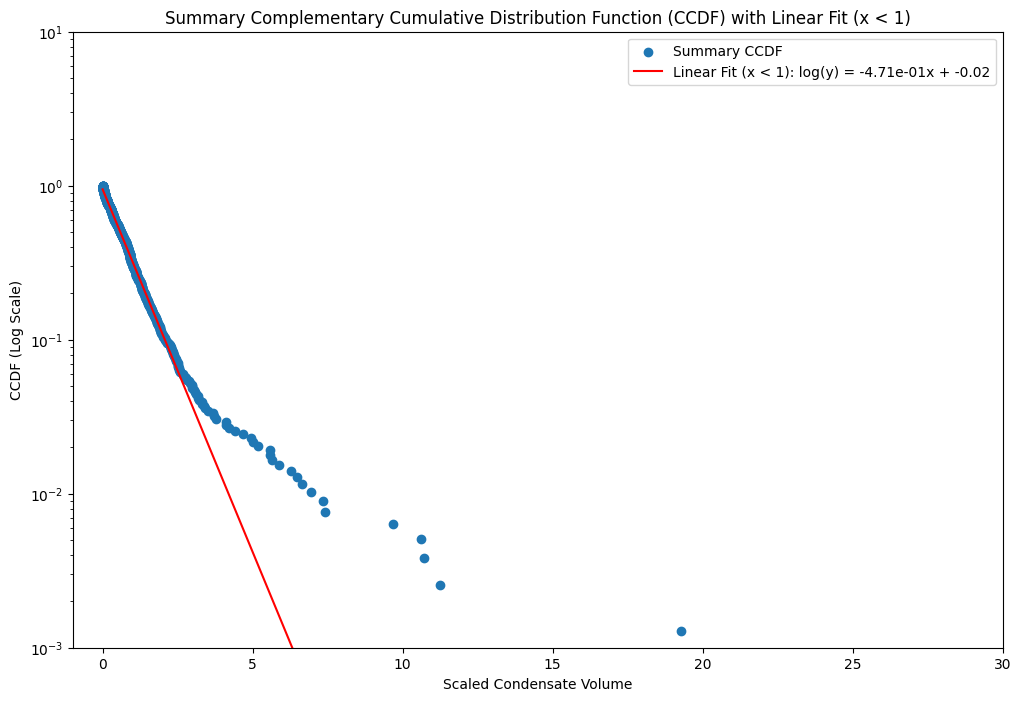

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('xx.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/JABr_outside_linear.svg')
plt.show()


#10ntABr outside

In [ ]:
# Load data
data = pd.read_csv('xx.csv')

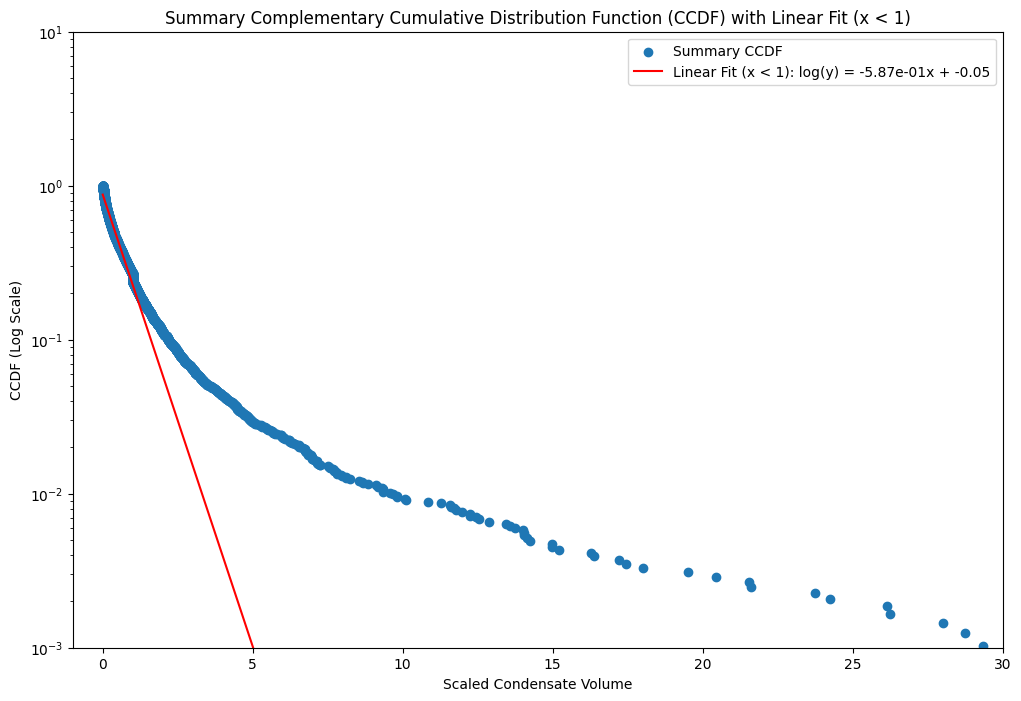

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_10ntABr_outside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/10ntABr_outside_linear.svg')
plt.show()


<ipython-input-44-5e3d4be52153>:15: RuntimeWarning: divide by zero encountered in log10
  linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting
<ipython-input-44-5e3d4be52153>:21: RuntimeWarning: divide by zero encountered in divide
  plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')


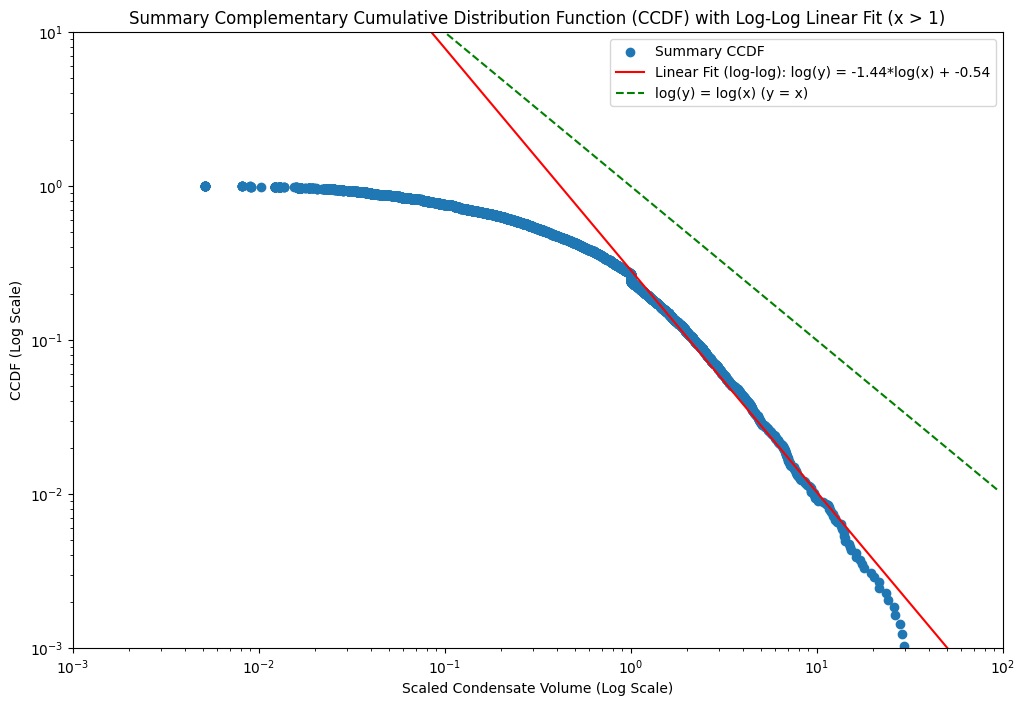

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/10ntABr_outside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#20ntABr inside

In [ ]:
# Load data
data = pd.read_csv('/AABr_inside.csv')

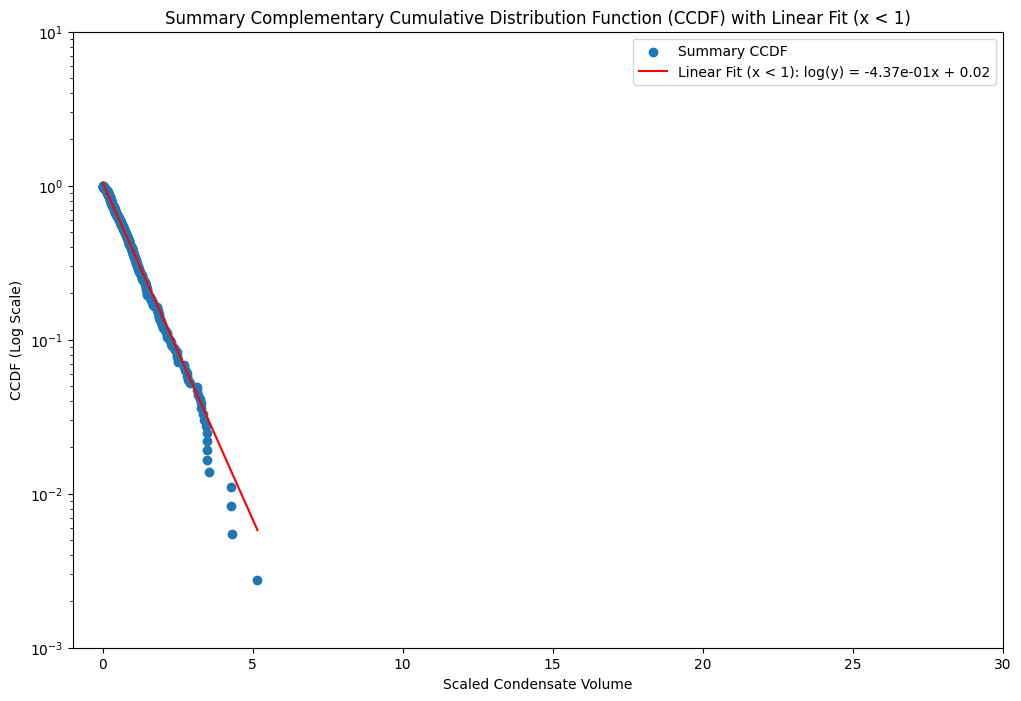

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_AABr_inside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/20ntABr_inside_linear.svg')
plt.show()


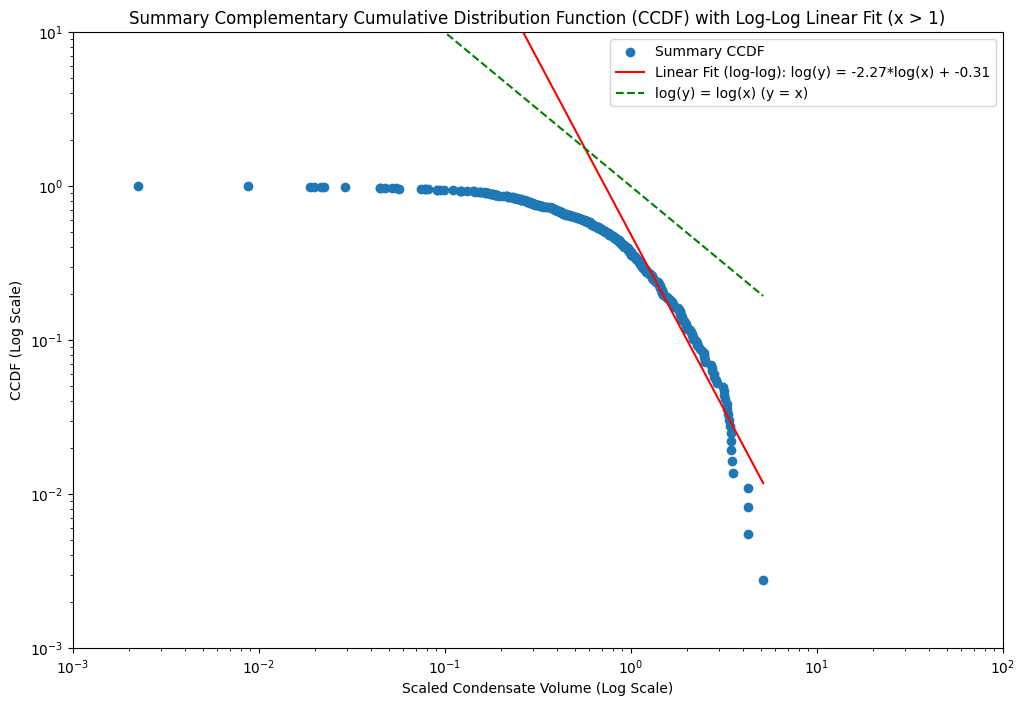

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/20ntABr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#20ntABr outside

In [ ]:
# Load data
data = pd.read_csv('/AABr_outside.csv')

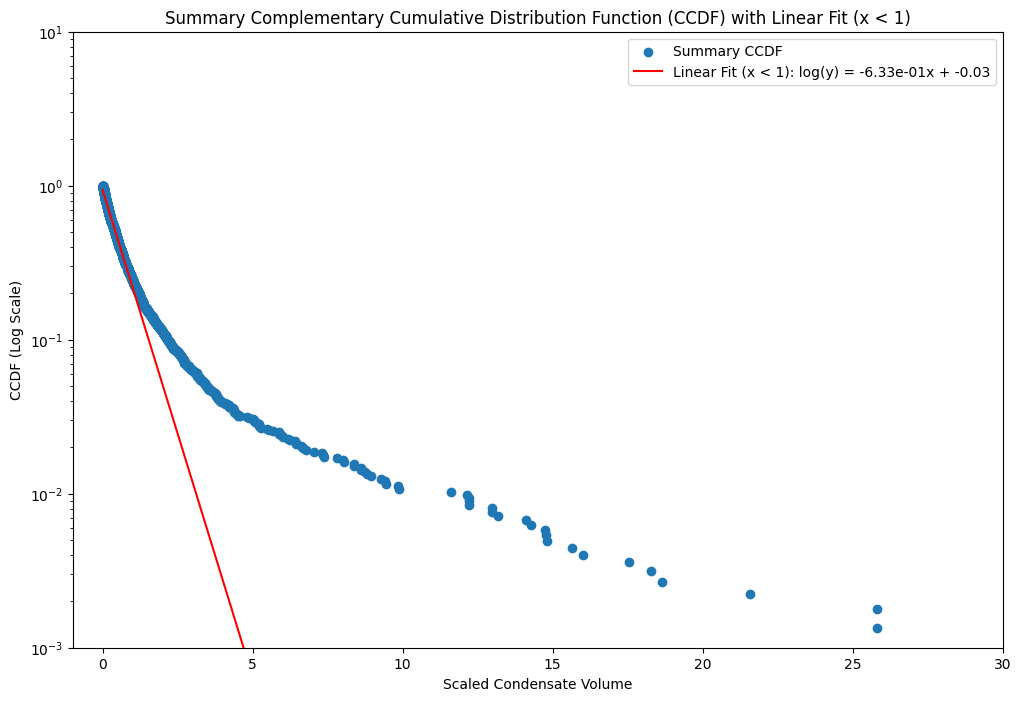

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_AABr_outside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/20ntABr_outside_linear.svg')
plt.show()


<ipython-input-34-36085a321136>:15: RuntimeWarning: divide by zero encountered in log10
  linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
<ipython-input-34-36085a321136>:21: RuntimeWarning: divide by zero encountered in divide
  plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')


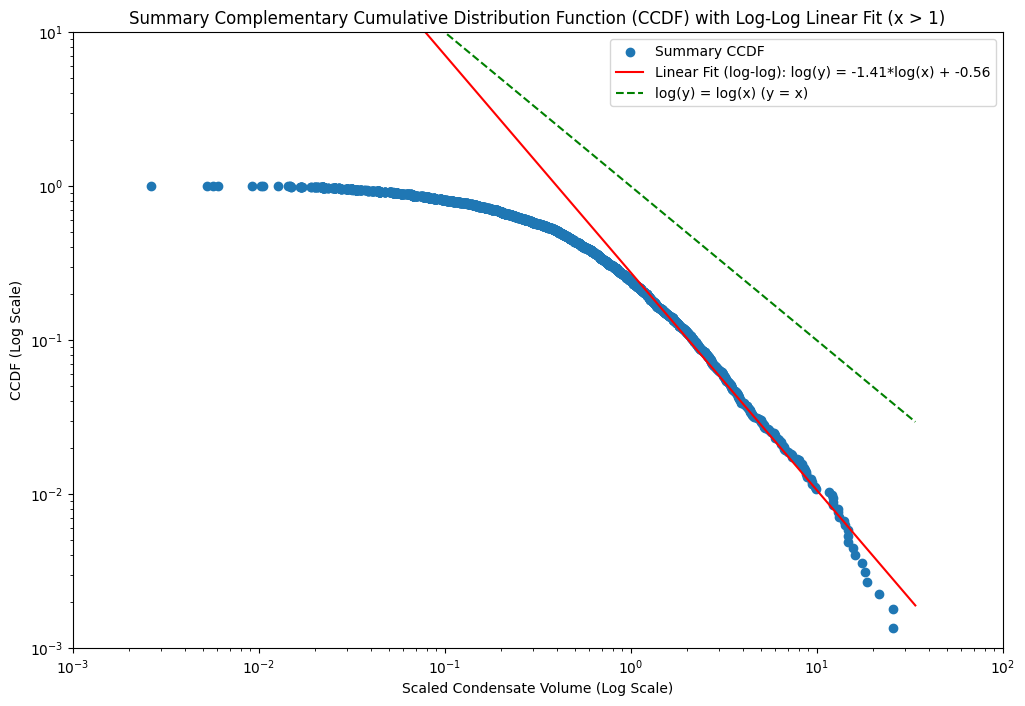

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/20ntABr_outside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#15ntWTBr inside

In [ ]:
# Load data
data = pd.read_csv('/JwtBr_inside.csv')

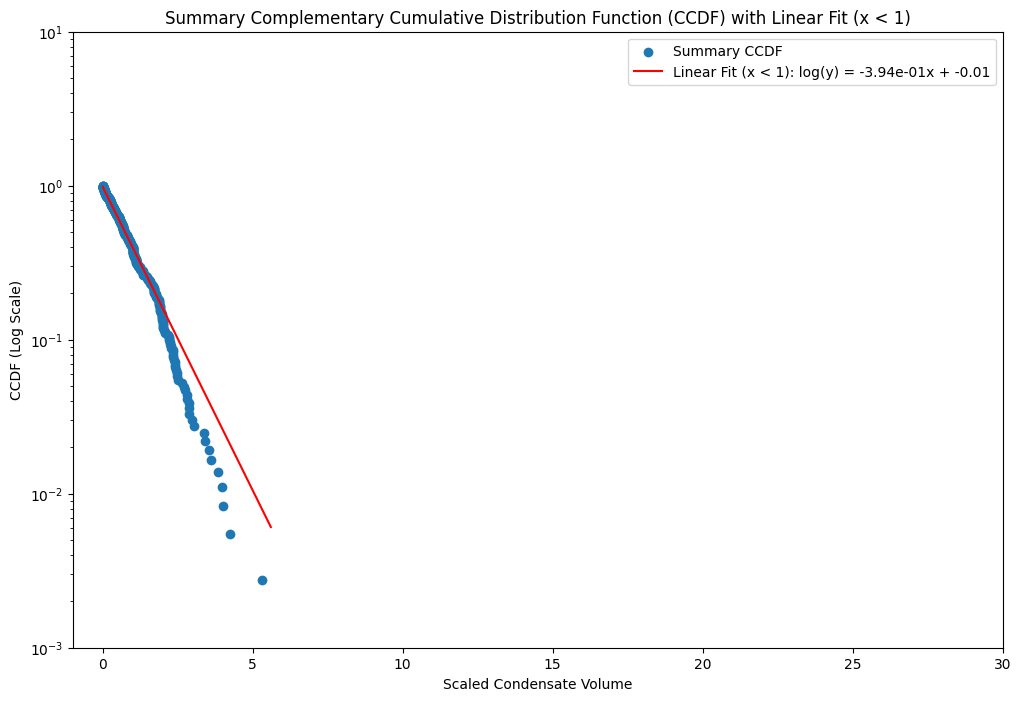

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_JwtBr_inside.csv', index=False)
# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/JwtBr_inside_linear.svg')
plt.show()


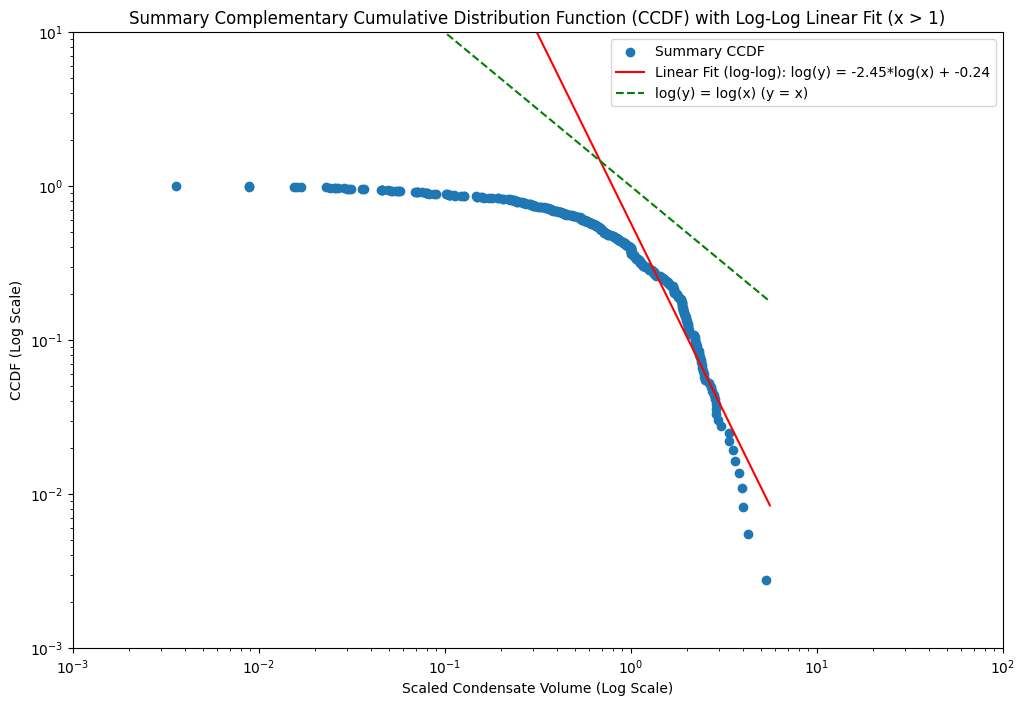

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/JwtBr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#15ntWTBr outside

In [ ]:
# Load data
data = pd.read_csv('/JwtBr_outside.csv')

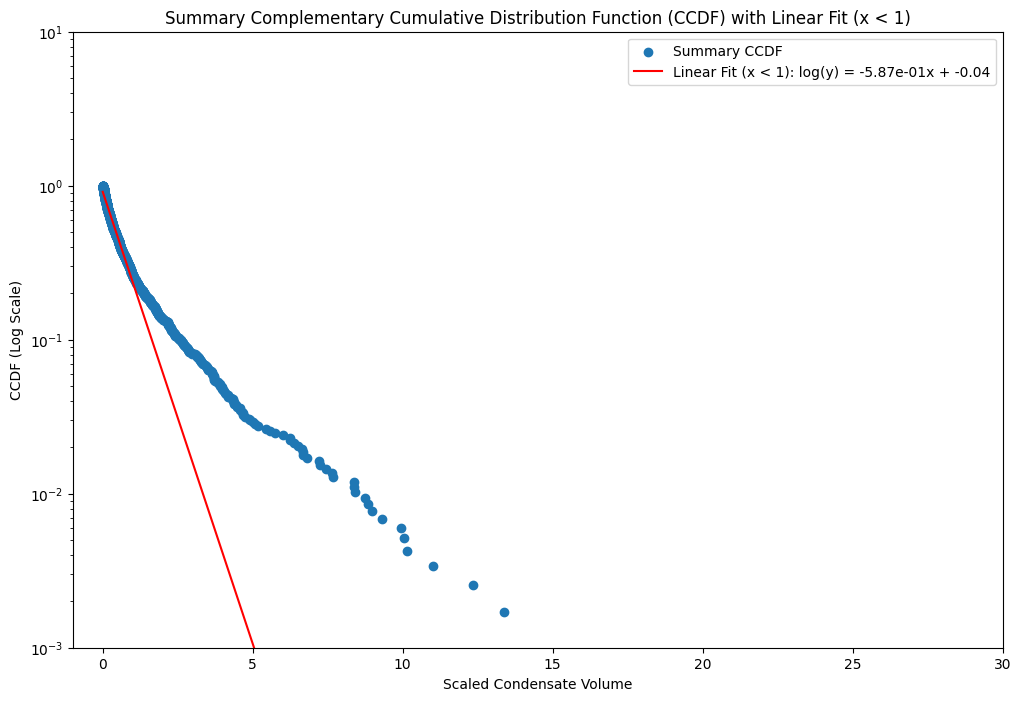

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_JwtBr_outside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/JwtBr_outside_linear.svg')
plt.show()


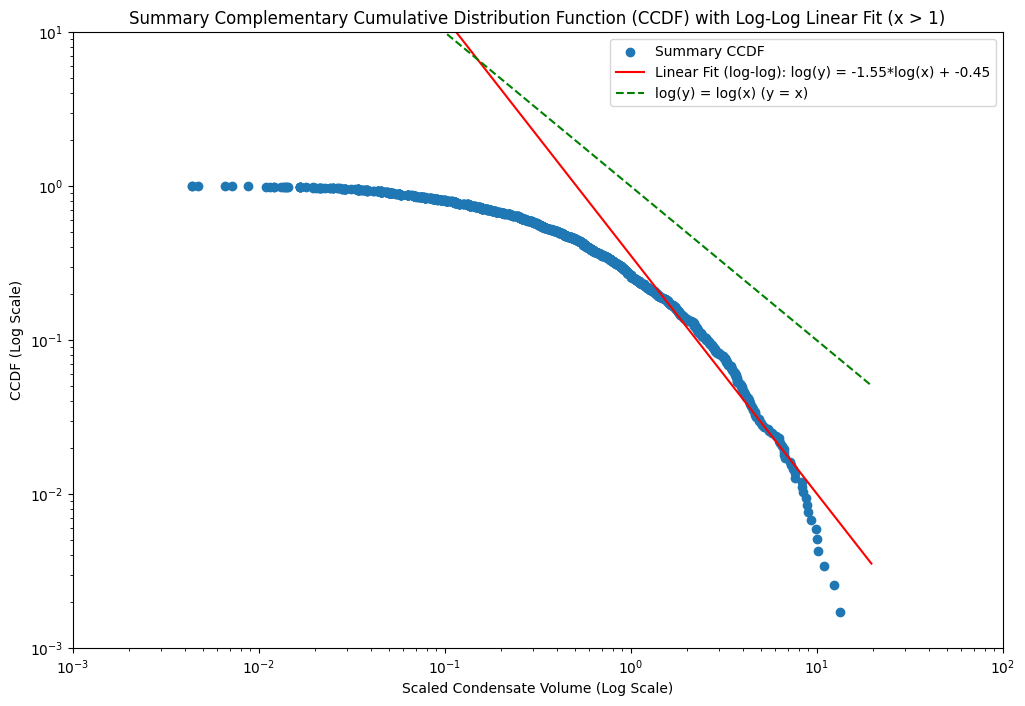

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/JwtBr_outside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#25ntABr inside

In [ ]:
data = pd.read_csv('/GABr_inside.csv')

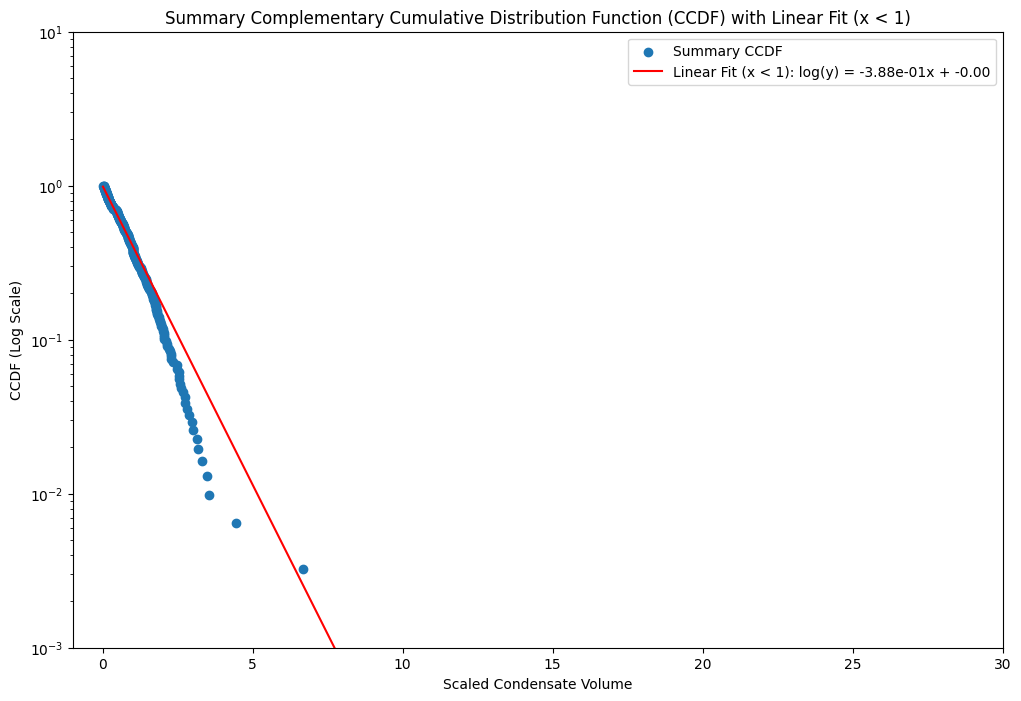

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_GABr_inside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/25ntABr_inside_linear.svg')
plt.show()


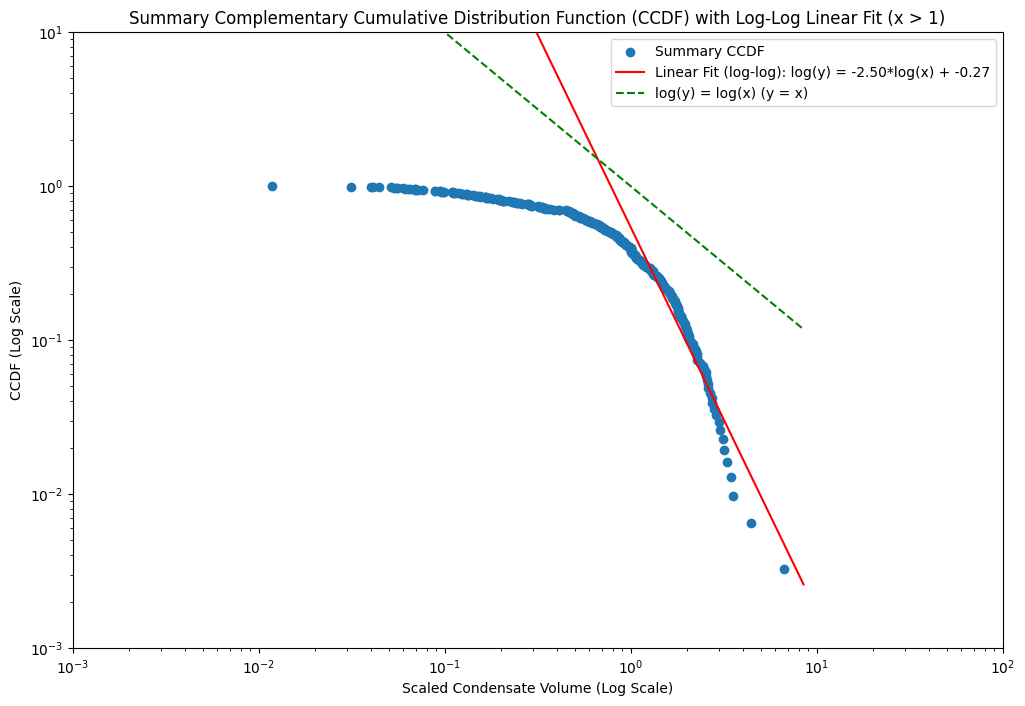

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/25ntABr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


#25ntABr outside

In [ ]:
# Load data
data = pd.read_csv('/GABr_outside.csv')

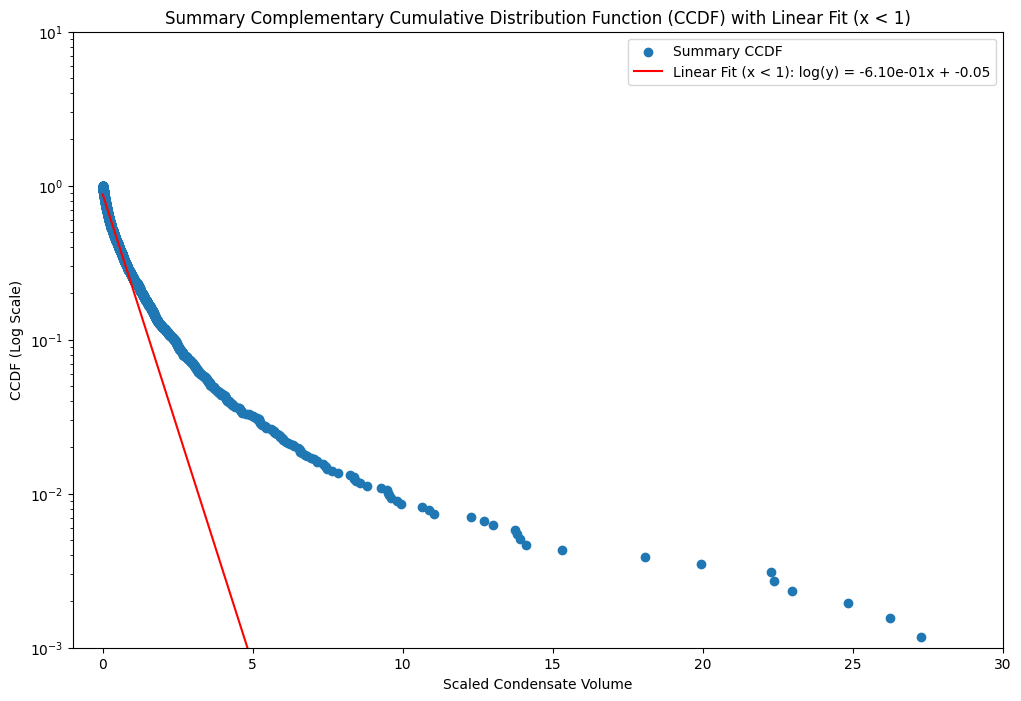

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_GABr_outside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/25ntABr_outside_linear.svg')
plt.show()


<ipython-input-47-f4786dab2792>:15: RuntimeWarning: divide by zero encountered in log10
  linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
<ipython-input-47-f4786dab2792>:21: RuntimeWarning: divide by zero encountered in divide
  plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')


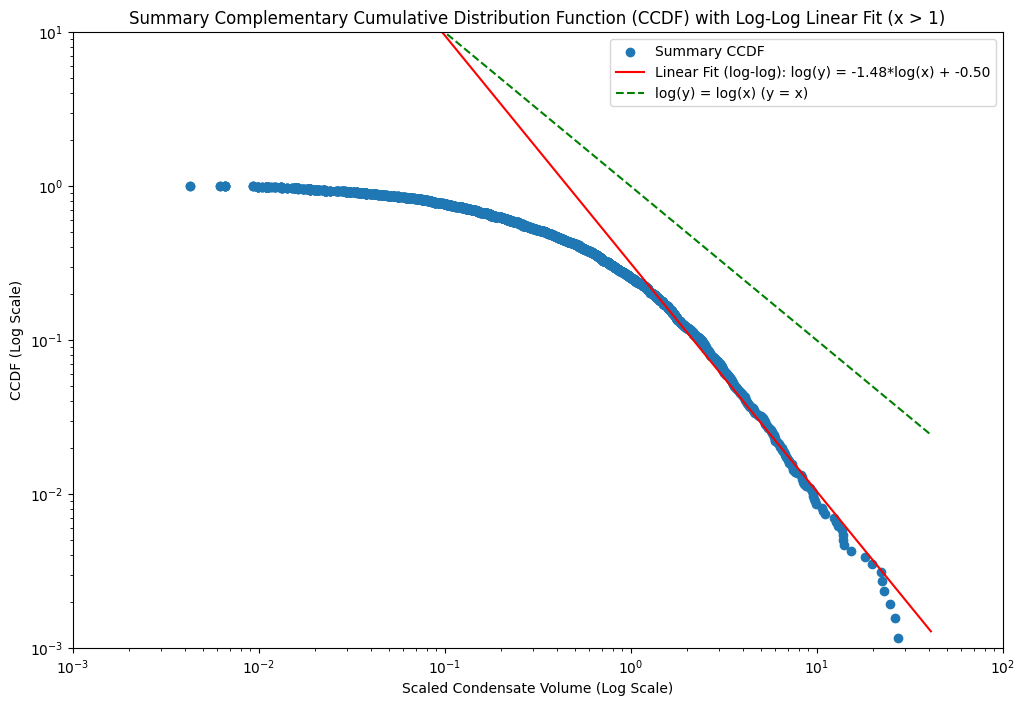

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
plt.savefig('/25ntABr_outside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


# 4 arm inside

In [ ]:
data = pd.read_csv('/4 arm_inside.csv')

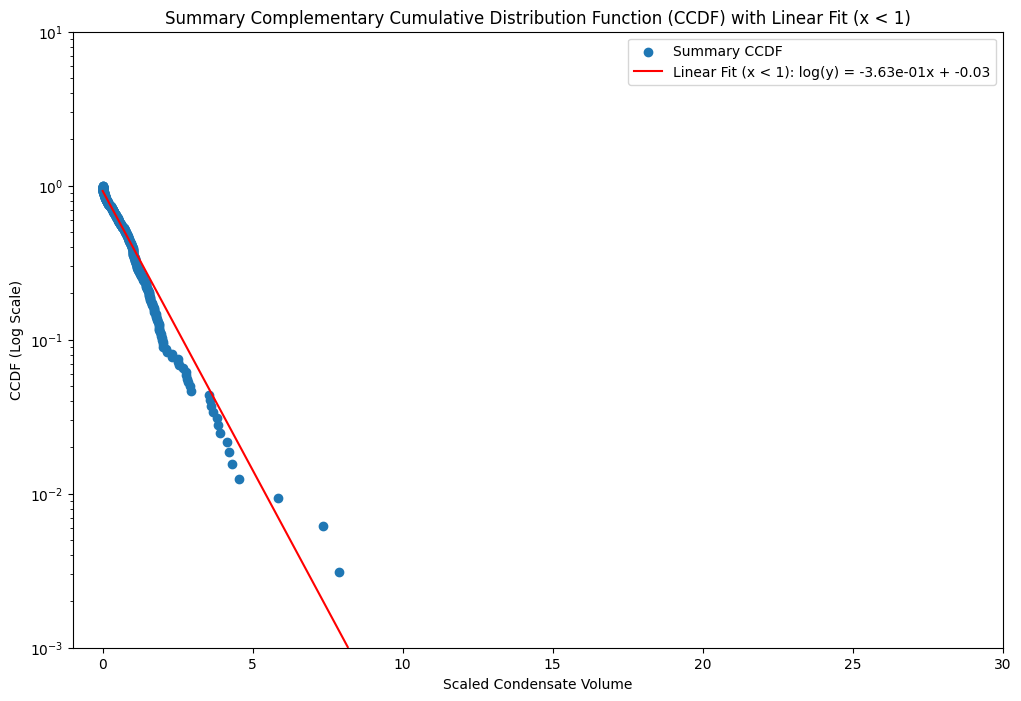

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_4 arm_inside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/25ntABr_inside_linear.svg')
plt.show()


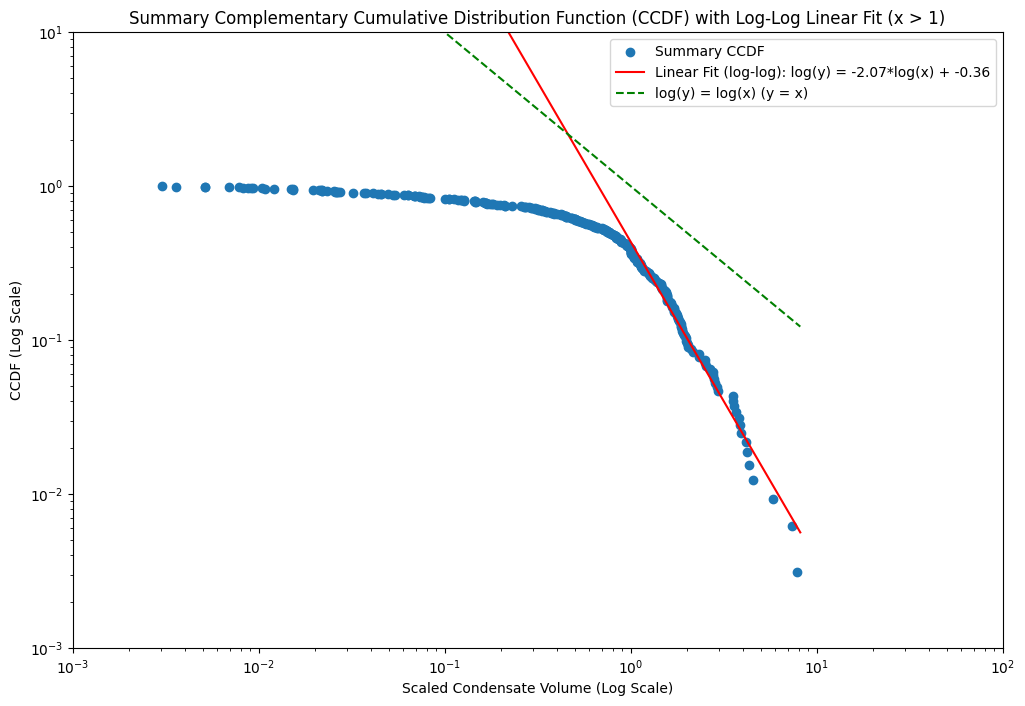

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
# plt.savefig('/25ntABr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


# 4 arm outside

In [ ]:
data = pd.read_csv('/4 arm_outside.csv')

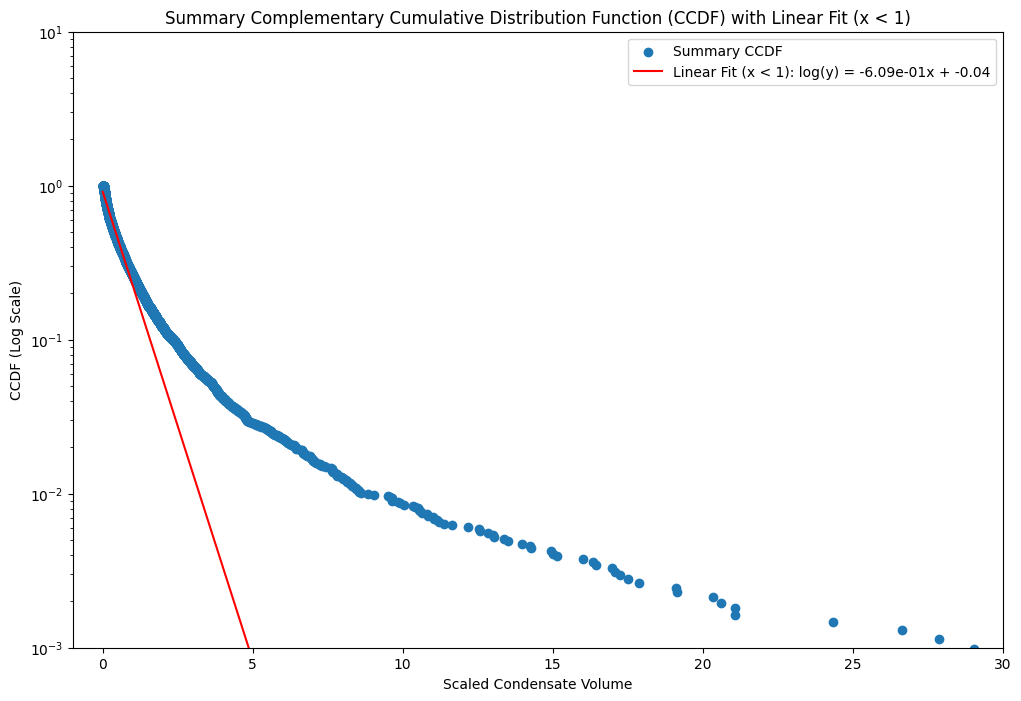

In [ ]:
# Get unique cell tags
cell_tags = data['cell_tag'].unique()

# Initialize dictionaries to store results
cdf_dict = {}
mean_volume_dict = {}
scaled_cdf_dict = {}

# Loop through each cell
for cell in cell_tags:
    # Filter data for the current cell
    cell_data = data[data['cell_tag'] == cell]

    # Calculate the CDF
    sorted_volumes = np.sort(cell_data['volume'])
    cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

    # Store the CDF
    cdf_dict[cell] = (sorted_volumes, cdf)

    # Calculate and store the mean condensate volume
    mean_volume = np.mean(cell_data['volume'])
    mean_volume_dict[cell] = mean_volume

    # Scale the volumes and recalculate the CDF
    scaled_volumes = sorted_volumes / mean_volume
    scaled_cdf = np.arange(1, len(scaled_volumes) + 1) / len(scaled_volumes)

    # Store the scaled CDF
    scaled_cdf_dict[cell] = (scaled_volumes, scaled_cdf)

# Pool all cells together for the summary CCDF
all_volumes = np.concatenate([scaled_volumes for scaled_volumes, _ in scaled_cdf_dict.values()])
pooled_cdf = np.arange(1, len(all_volumes) + 1) / len(all_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/pooled_ccdf_4 arm_outside.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Fit a linear line to the filtered data
coefficients = np.polyfit(filtered_volumes, np.log10(filtered_ccdf), 1)  # Fit: log(y) = mx + c
linear_fit = np.polyval(coefficients, sorted_volumes)  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}x + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Scaled Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(-1,30)
# plt.savefig('/25ntABr_inside_linear.svg')
plt.show()

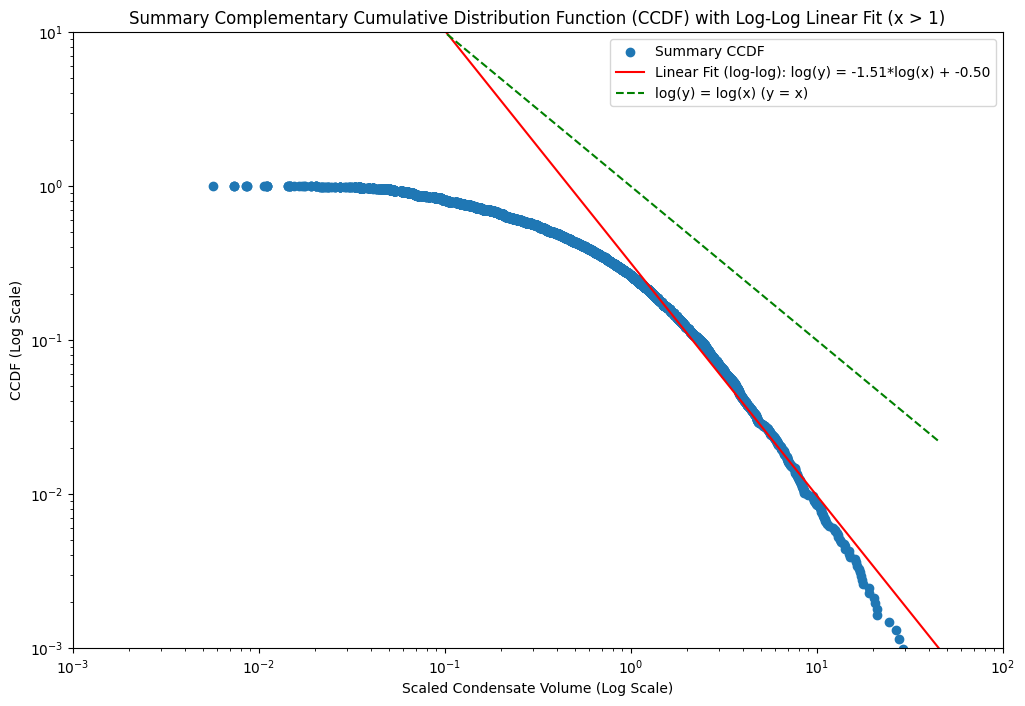

In [ ]:
# Apply filter for x > 1
mask = sorted_volumes > 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# Further filter to remove zero values in the CCDF
nonzero_mask = filtered_ccdf > 0
filtered_volumes = filtered_volumes[nonzero_mask]
filtered_ccdf = filtered_ccdf[nonzero_mask]

# Fit a linear line to the data in log-log space
log_x = np.log10(filtered_volumes)
log_y = np.log10(filtered_ccdf)
coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic x-axis and y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (log-log): log(y) = {coefficients[0]:.2f}*log(x) + {coefficients[1]:.2f}')
plt.plot(sorted_volumes, 1/sorted_volumes, color='green', linestyle='--', label='log(y) = log(x) (y = x)')
plt.xscale('log')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Log-Log Linear Fit (x > 1)')
plt.xlabel('Scaled Condensate Volume (Log Scale)')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001,10)
plt.xlim(0.001,100)
# plt.savefig('/25ntABr_inside_log.svg')
plt.show()

# # Calculate and print mean condensate volumes for each cell
# for cell, mean_volume in mean_volume_dict.items():
#     print(f'Mean condensate volume for cell {cell}: {mean_volume:.2f}')


# Time lapse - 10ntABr outside

## 12 hr

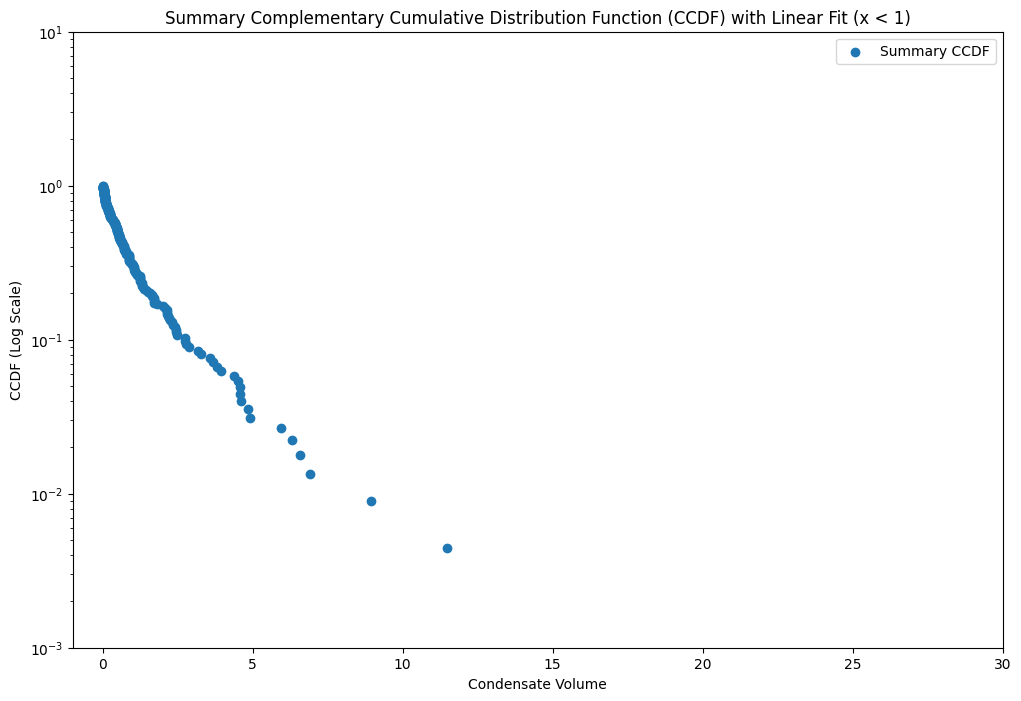

In [ ]:
# Load the data
data = pd.read_csv('/10ntABr_12hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/10ntABr_12hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24 hr

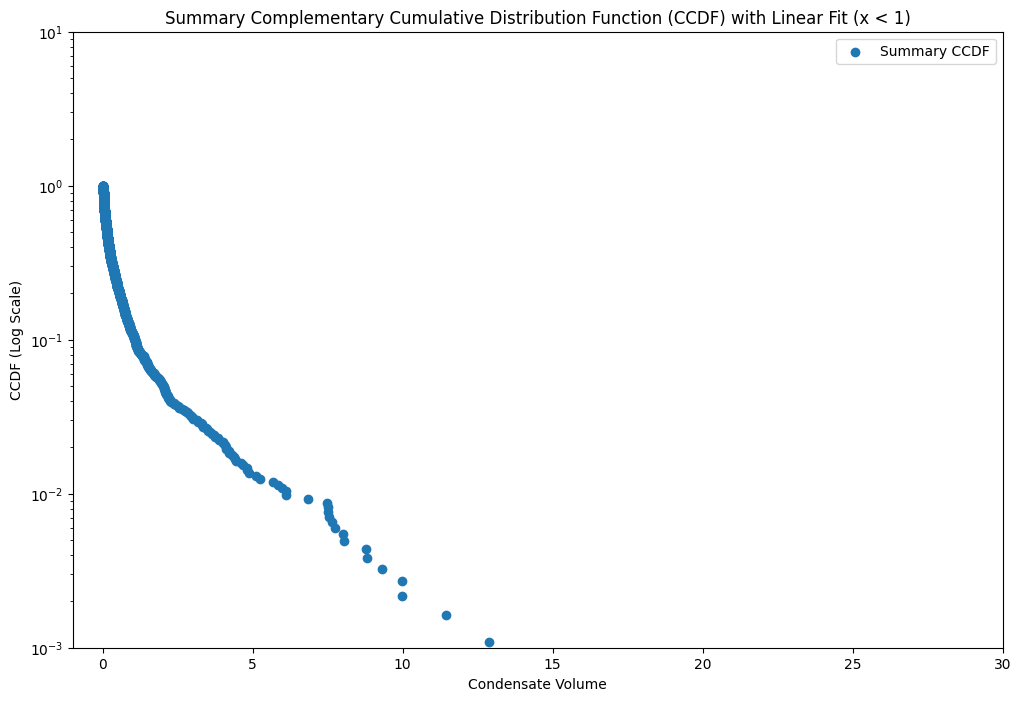

In [ ]:
# Load the data
data = pd.read_csv('/10ntABr_24hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/10ntABr_24hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

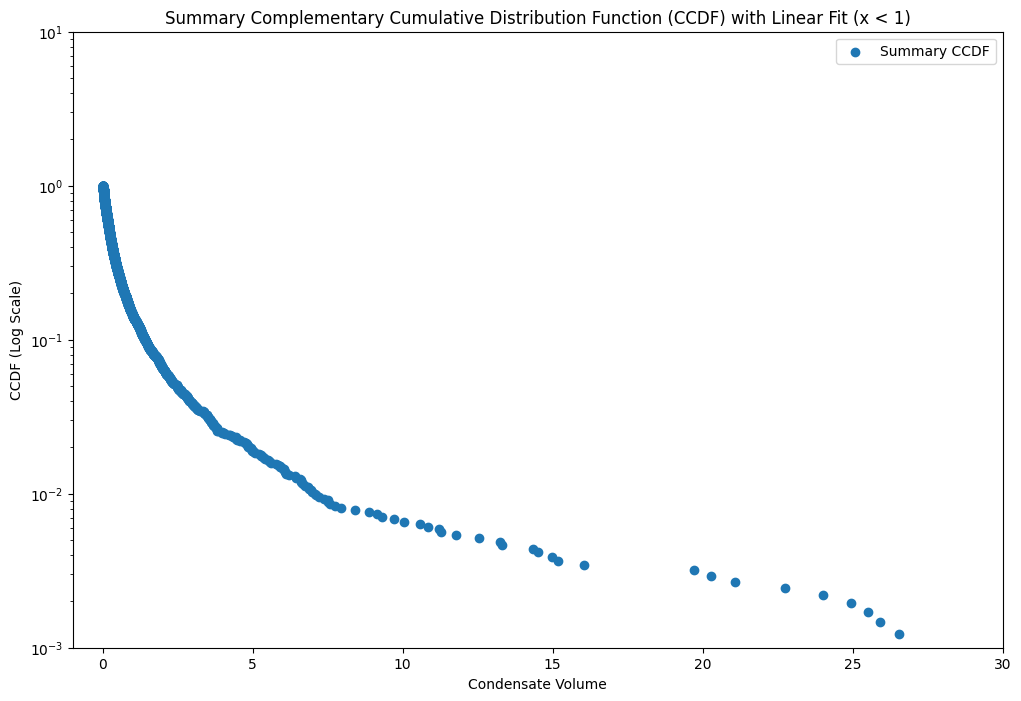

In [ ]:
# Load the data
data = pd.read_csv('/10ntABr_48hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/10ntABr_48hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lapse - 15ntABr inside

## 12hr

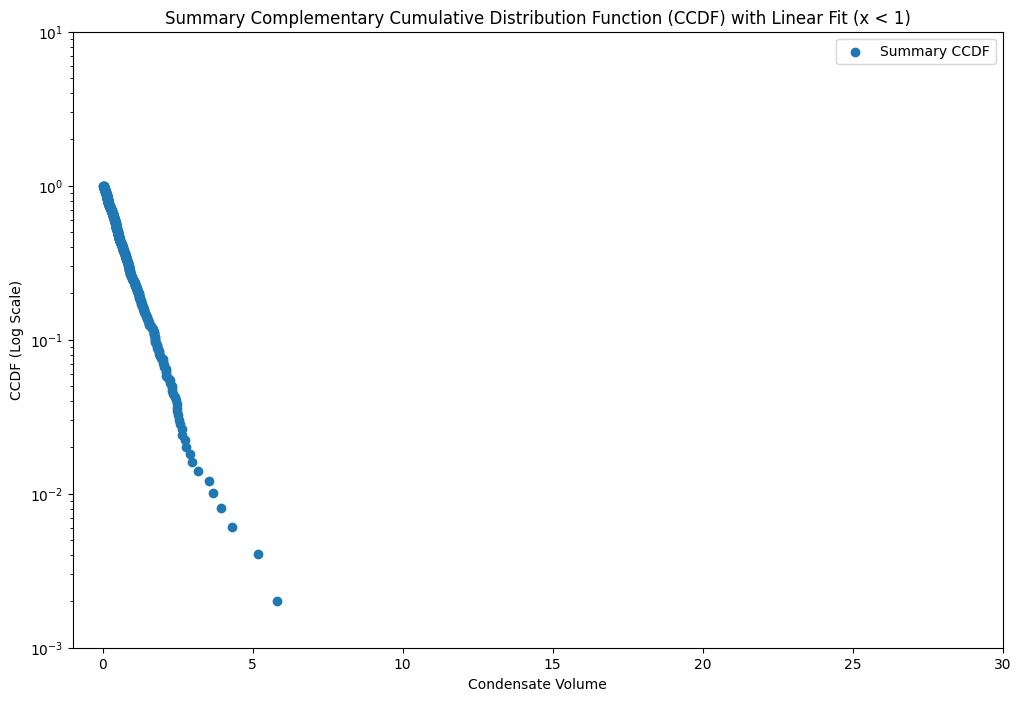

In [ ]:
# Load the data
data = pd.read_csv('/JABr_12hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_12hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

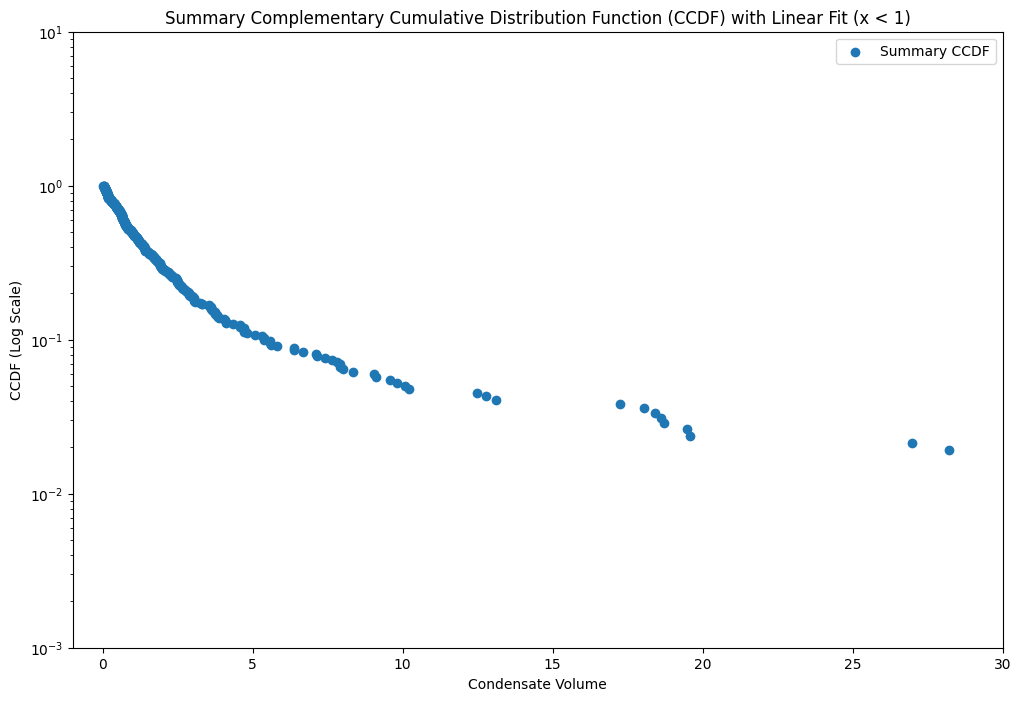

In [ ]:
# Load the data
data = pd.read_csv('/JABr_24hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_24hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

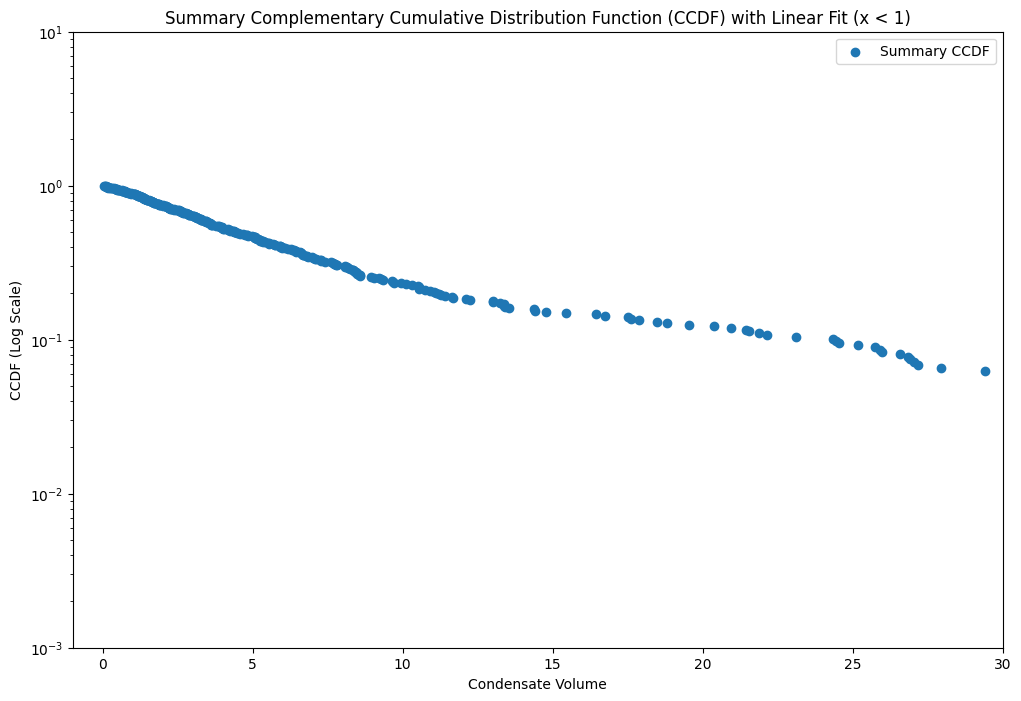

In [ ]:
# Load the data
data = pd.read_csv('/JABr_48hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_48hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lapse - 15ntABr outside

## 12hr

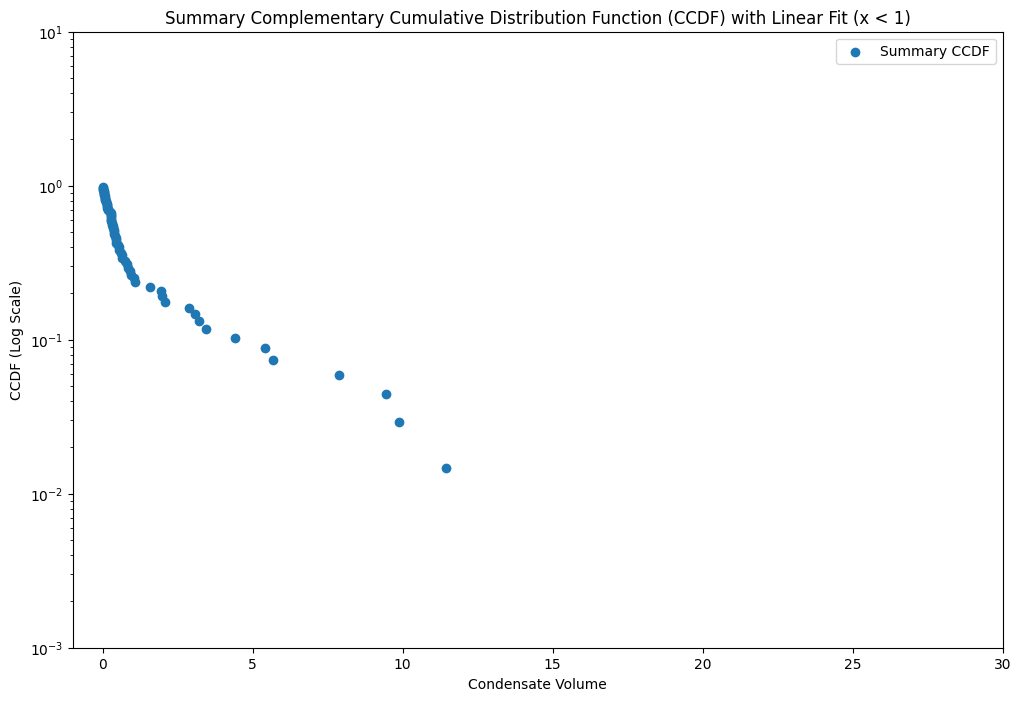

In [ ]:
# Load the data
data = pd.read_csv('/JABr_12hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_12hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

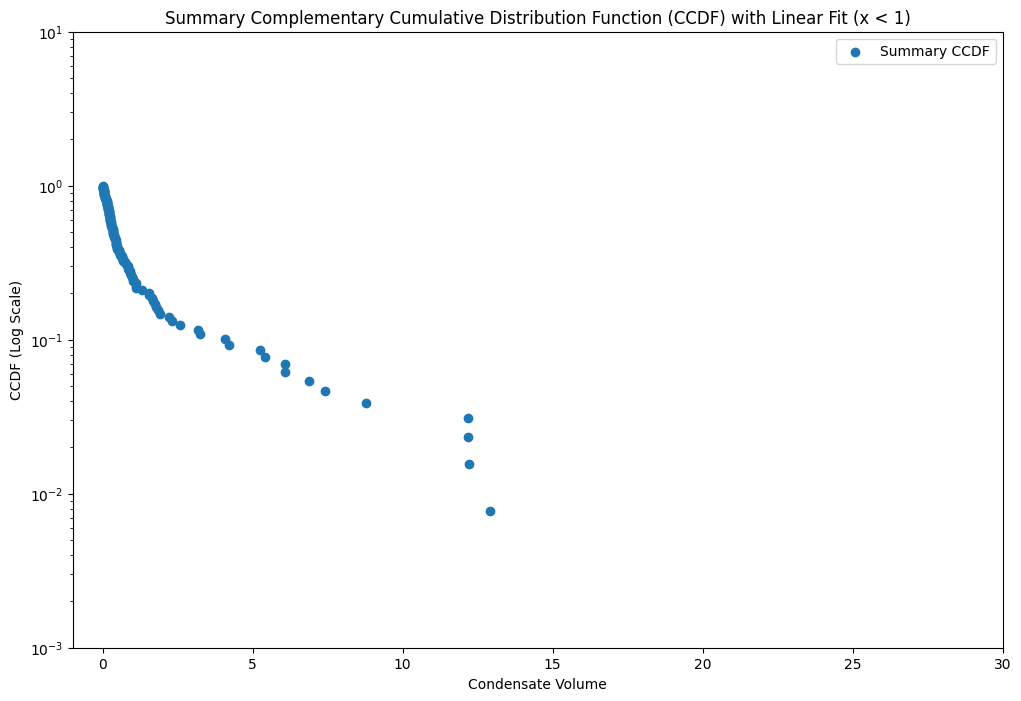

In [ ]:
# Load the data
data = pd.read_csv('/JABr_24hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_24hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

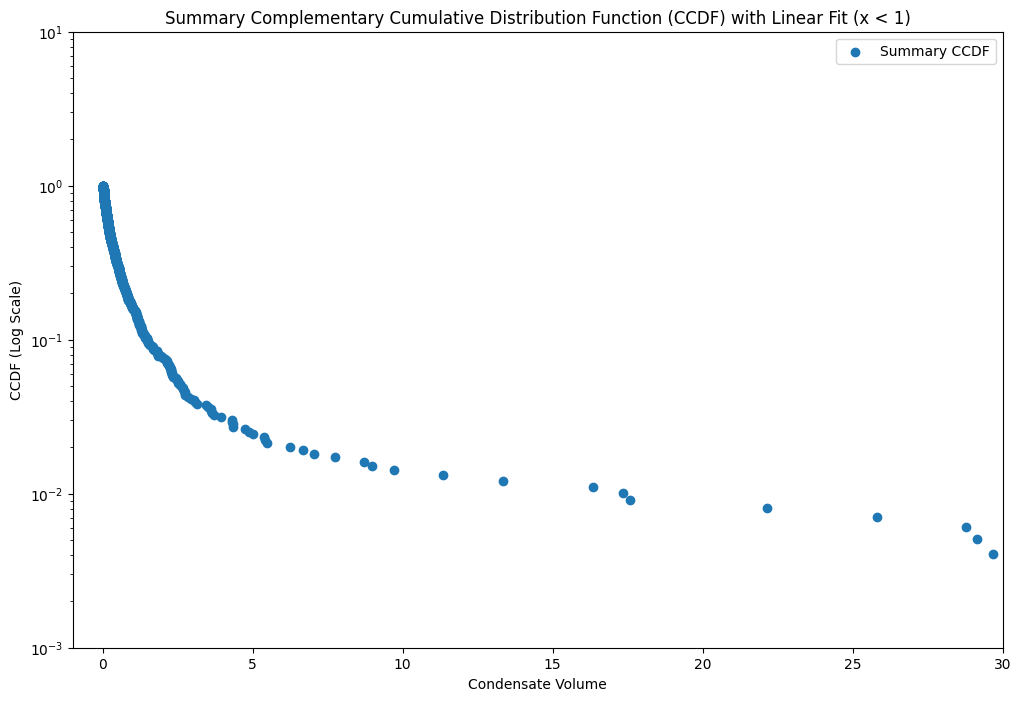

In [ ]:
# Load the data
data = pd.read_csv('/JABr_48hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JABr_48hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lapse - 20ntABr inside

## 6hr

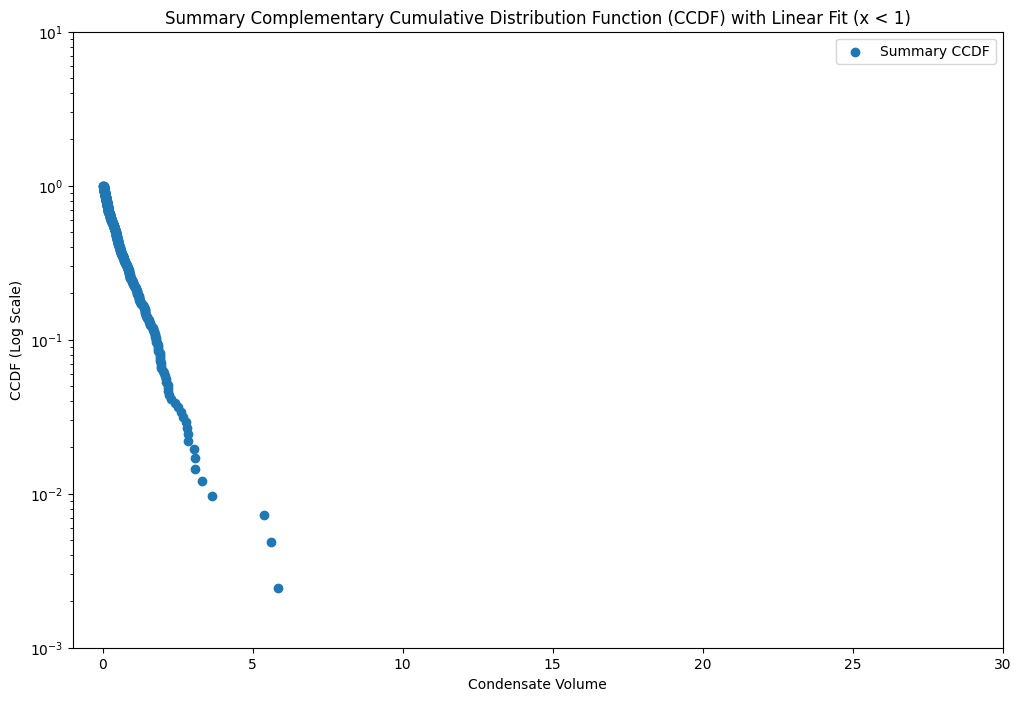

In [ ]:
# Load the data
data = pd.read_csv('/AABr_6hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_6hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 12hr

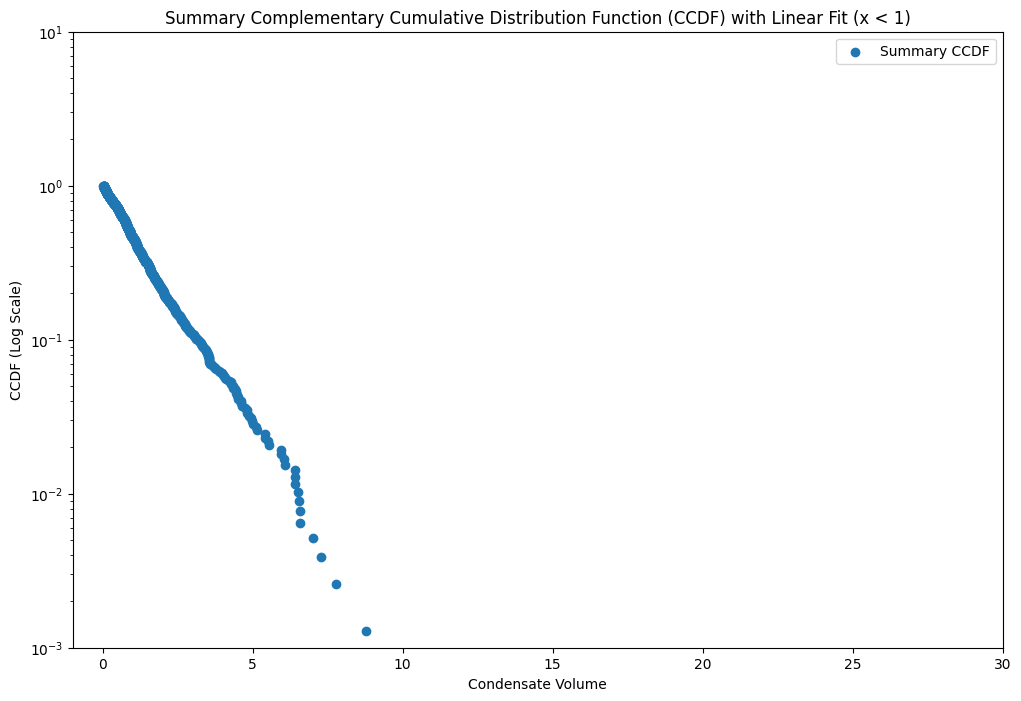

In [ ]:
# Load the data
data = pd.read_csv('/AABr_12hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_12hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

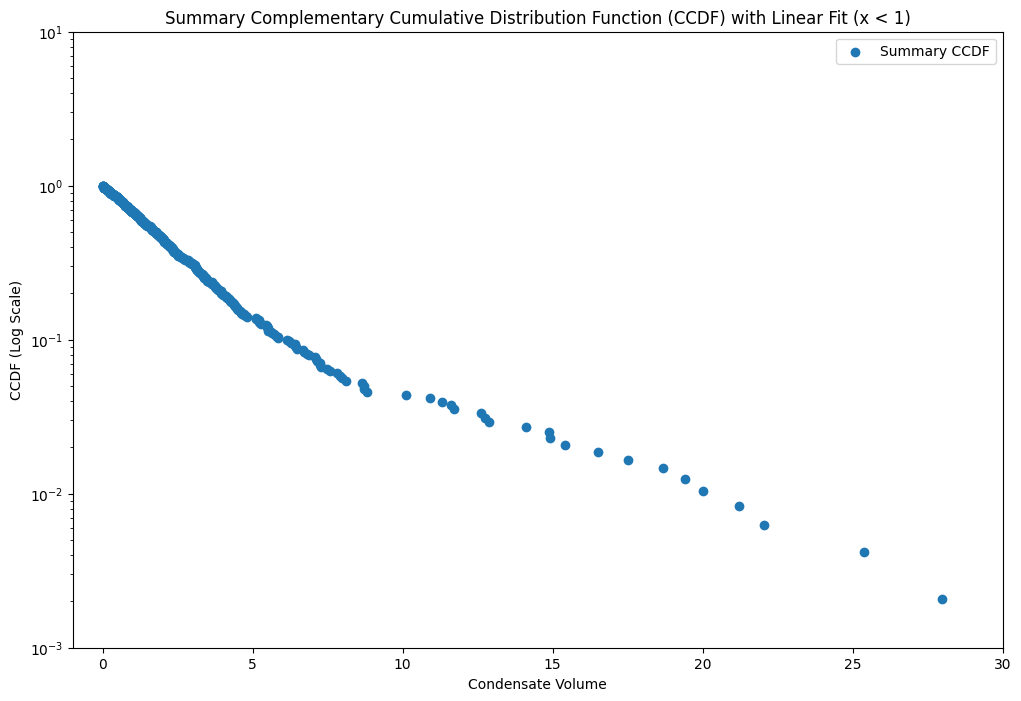

In [ ]:
# Load the data
data = pd.read_csv('/AABr_24hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_24hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

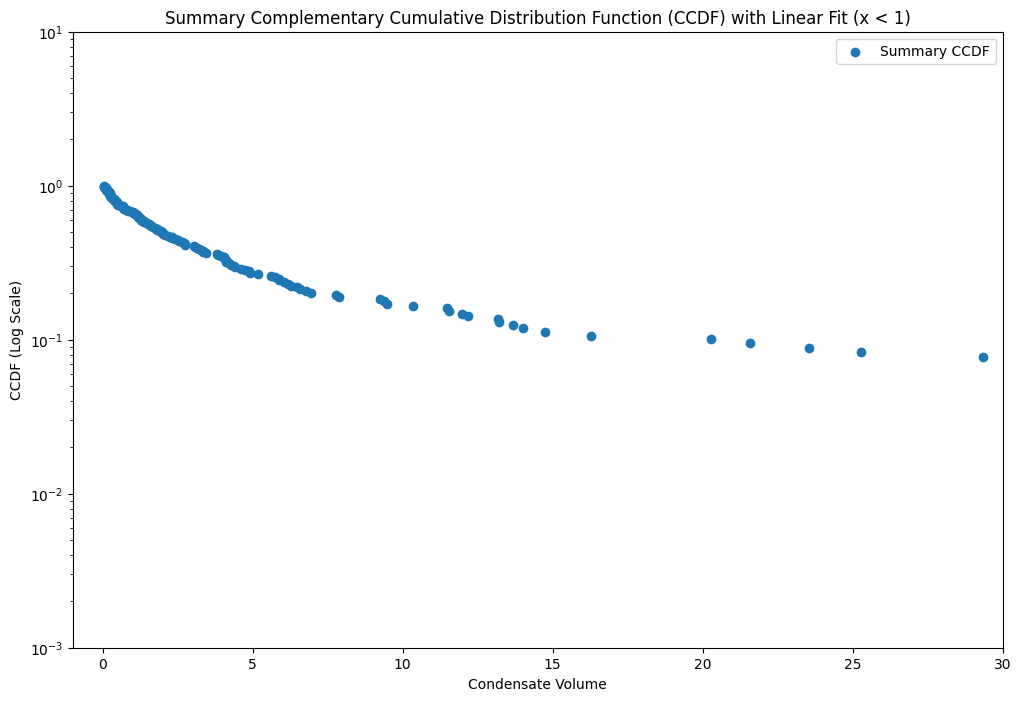

In [ ]:
# Load the data
data = pd.read_csv('/AABr_48hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_48hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lapse - 20ntABr outside

## 6hr

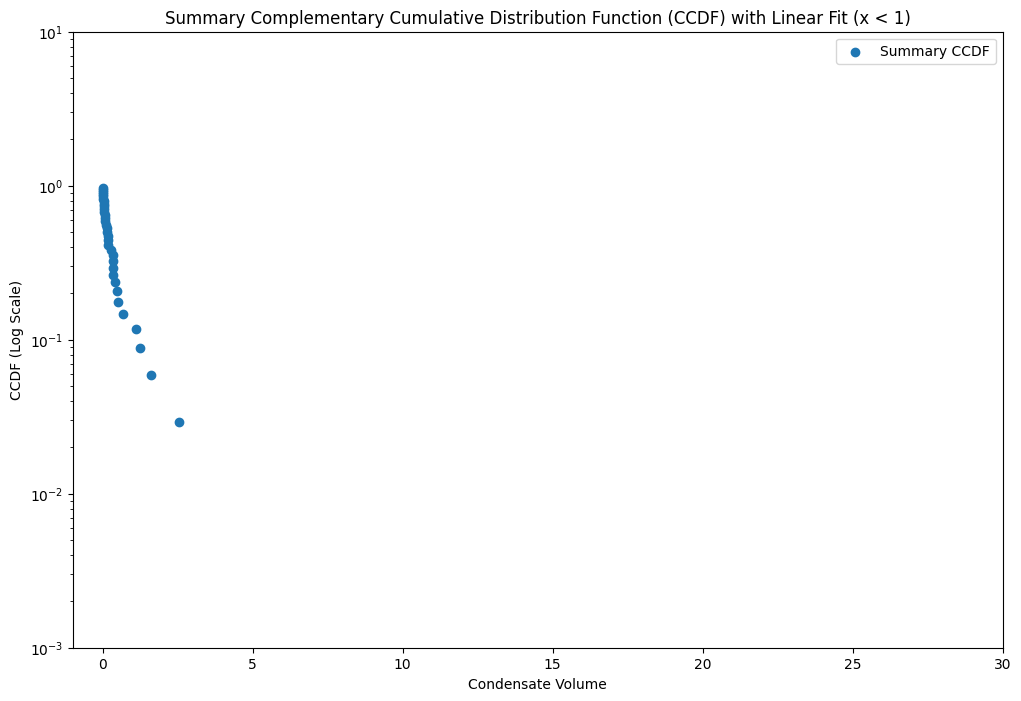

In [ ]:
# Load the data
data = pd.read_csv('/AABr_6hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_6hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 12hr

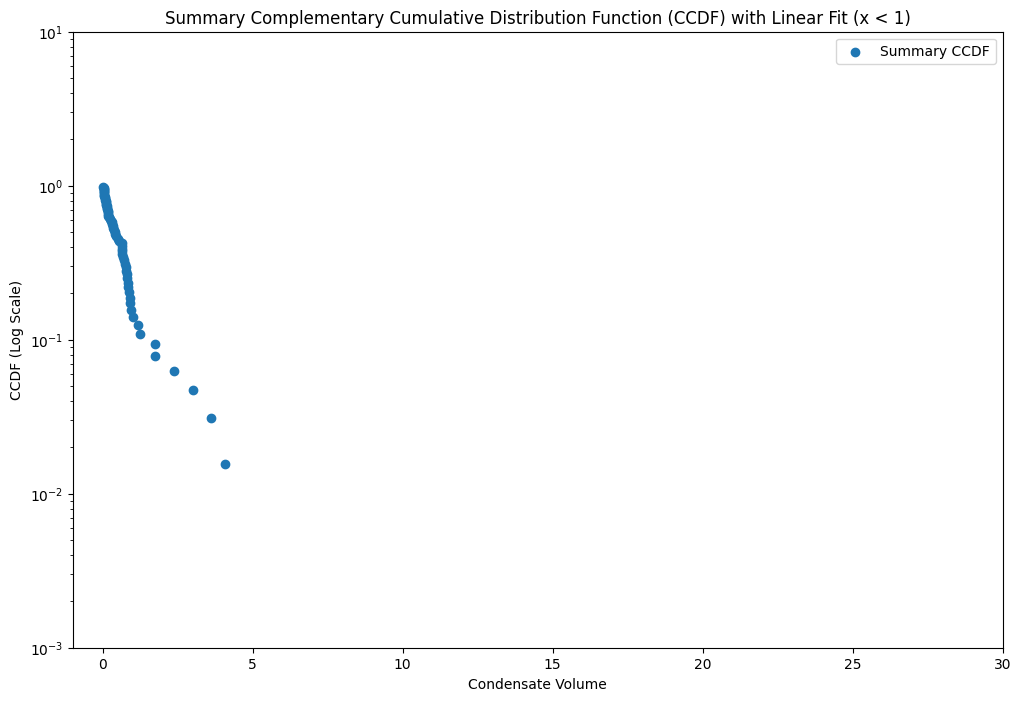

In [ ]:
# Load the data
data = pd.read_csv('/AABr_12hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_12hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

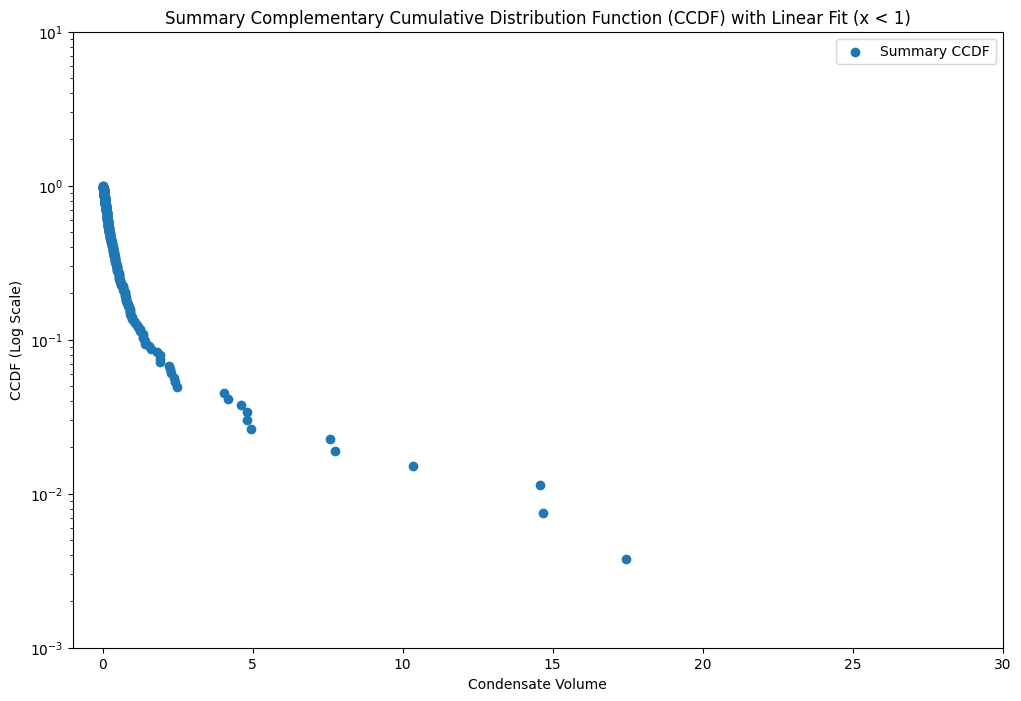

In [ ]:
# Load the data
data = pd.read_csv('/AABr_24hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_24hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

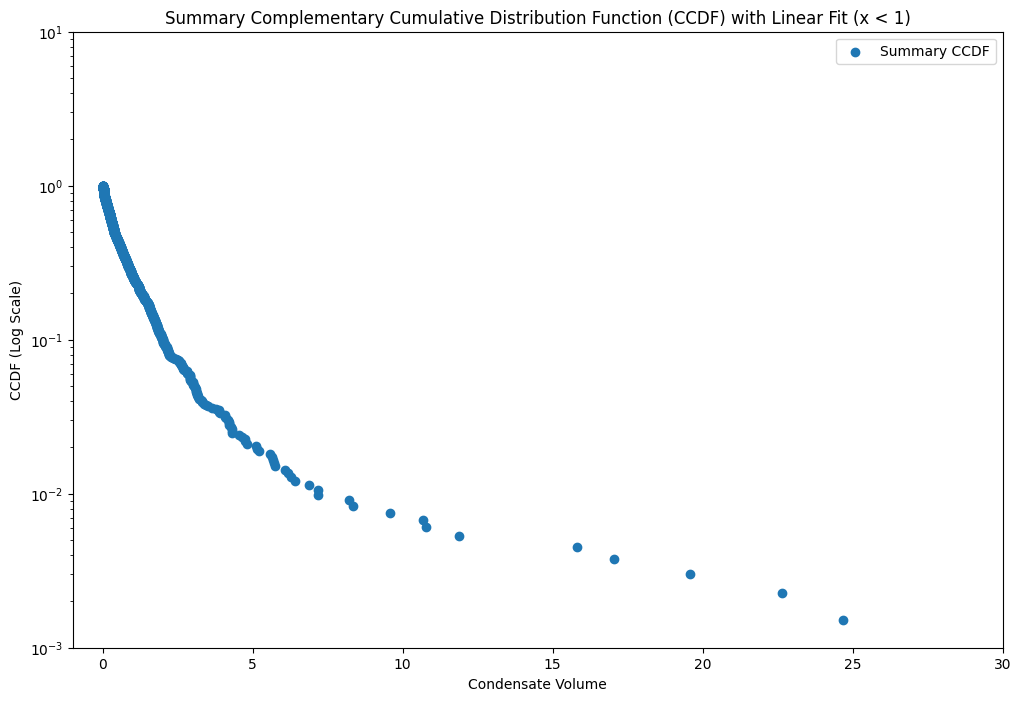

In [ ]:
# Load the data
data = pd.read_csv('/AABr_48hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/AABr_48hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lapse - 15ntwtBr inside

## 12hr

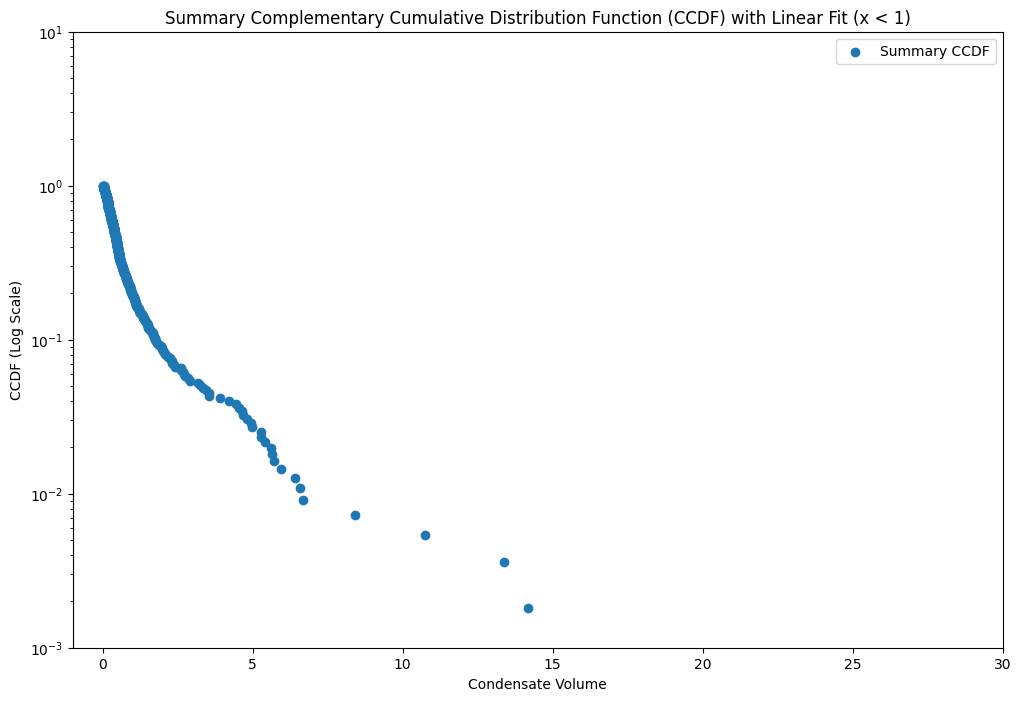

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_12hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_12hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

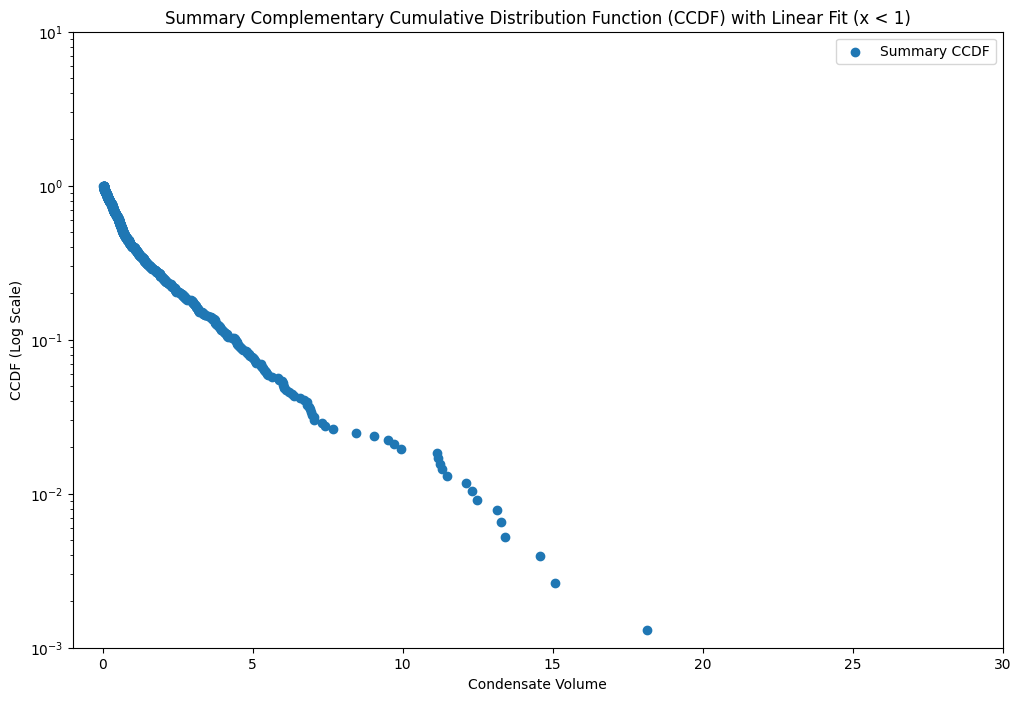

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_24hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_24hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

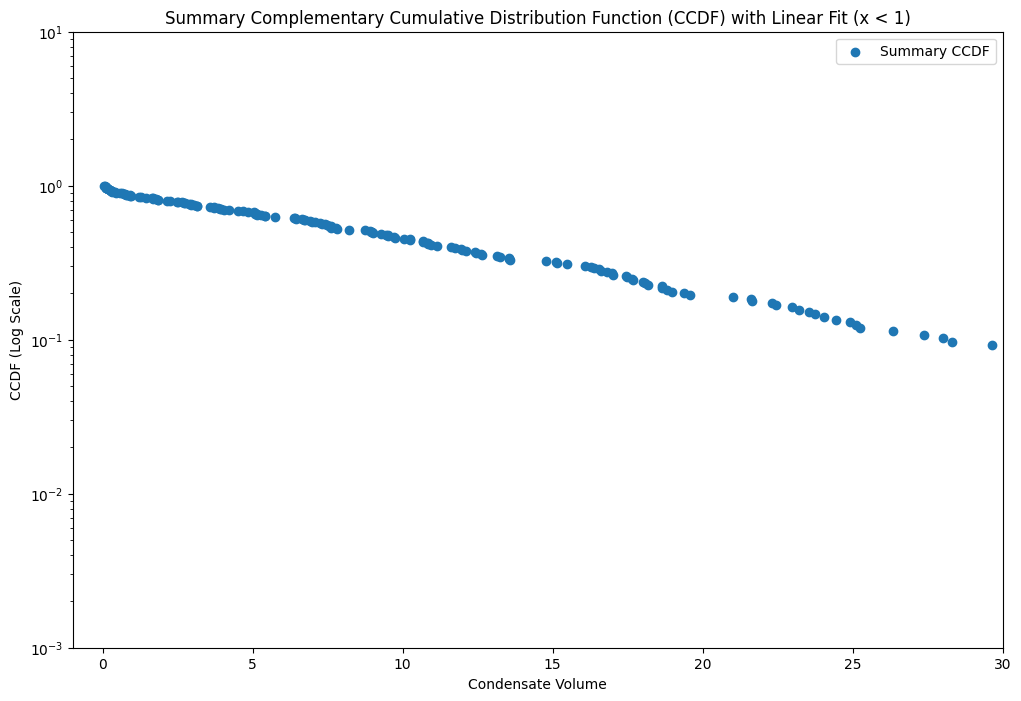

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_48hr_inside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_48hr_inside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


# Time lpase - 15ntwtBr outside


## 12hr

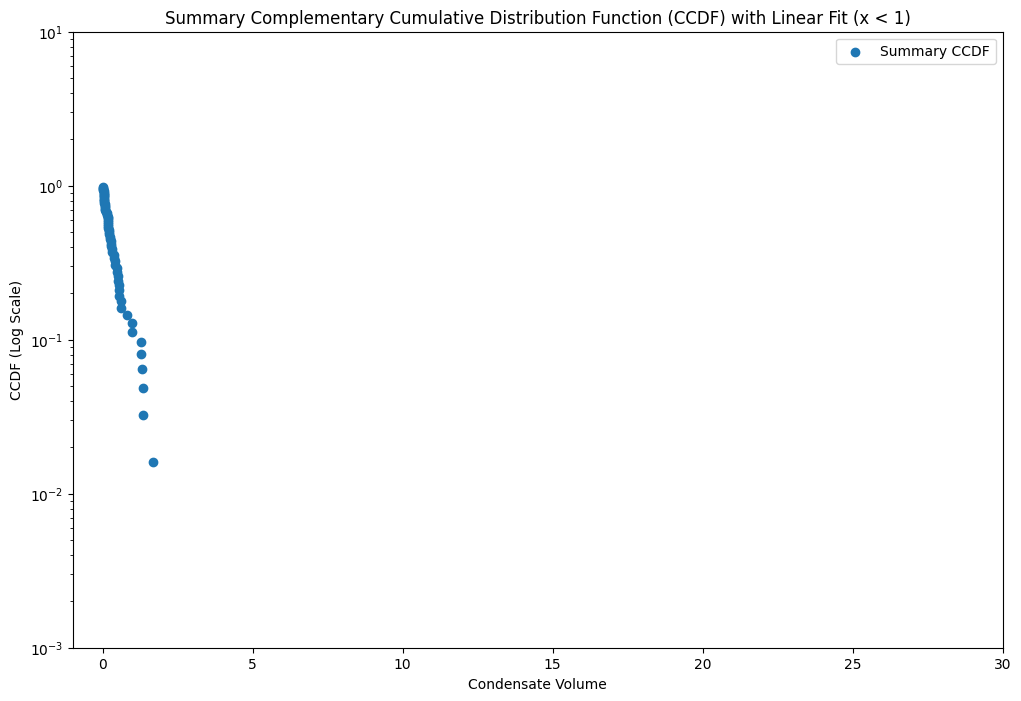

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_12hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_12hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 24hr

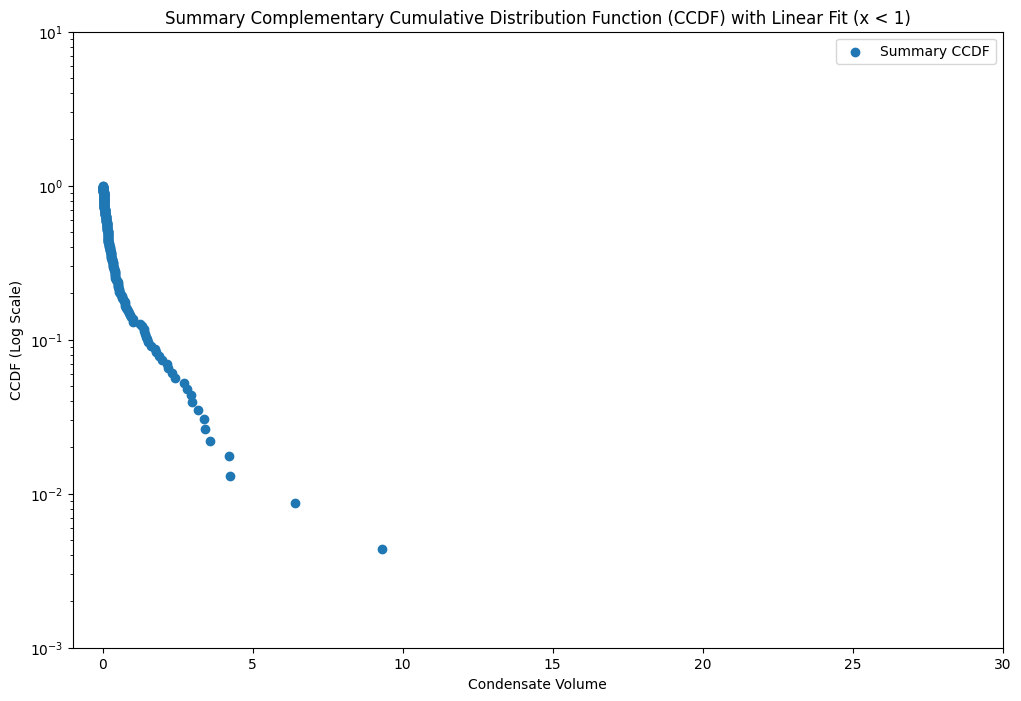

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_24hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_24hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()


## 48hr

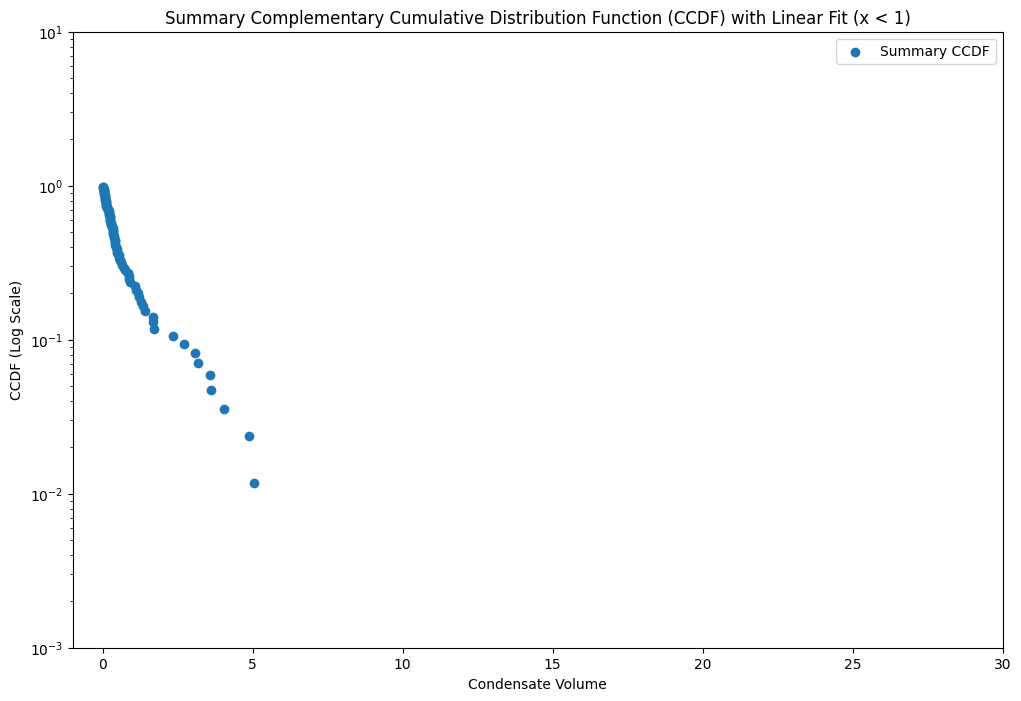

In [ ]:
# Load the data
data = pd.read_csv('/JwtBr_48hr_outside_allMeasurements.csv')

# Get all volumes
all_volumes = data['volume'].values

# Sort all volumes
sorted_volumes = np.sort(all_volumes)

# Calculate the CDF
pooled_cdf = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)

# Calculate the CCDF
ccdf = 1 - pooled_cdf

# Export data to CSV
export_data = pd.DataFrame({'Volume (x)': sorted_volumes, 'CCDF (y)': ccdf})
export_data.to_csv('/JwtBr_48hr_outside_absolute_volume.csv', index=False)

# Apply filter for x < 1
mask = sorted_volumes < 1
filtered_volumes = sorted_volumes[mask]
filtered_ccdf = ccdf[mask]

# # Fit a linear line to the filtered data (log-log space)
# log_x = np.log10(filtered_volumes)
# log_y = np.log10(filtered_ccdf)
# coefficients = np.polyfit(log_x, log_y, 1)  # Fit: log(y) = m*log(x) + c
# linear_fit = np.polyval(coefficients, np.log10(sorted_volumes))  # Apply the fit to the full range for plotting

# Plot the summary CCDF as a scatter plot with a logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(sorted_volumes, ccdf, label='Summary CCDF')
# plt.plot(sorted_volumes, 10**linear_fit, color='red', label=f'Linear Fit (x < 1): log(y) = {coefficients[0]:.2e}log(x) + {coefficients[1]:.2f}')
plt.yscale('log')
plt.title('Summary Complementary Cumulative Distribution Function (CCDF) with Linear Fit (x < 1)')
plt.xlabel('Condensate Volume')
plt.ylabel('CCDF (Log Scale)')
plt.legend()
plt.ylim(0.001, 10)
plt.xlim(-1, 30)
# plt.savefig('/10ntABr_12hr_outside_absolute_volume_linear_fit.svg')
plt.show()
